# Lending Club Case Study

#### Group members - Amit Kumar Das and Mukundhan S

### Problem Statement
A consumer finance company is in business of lending various types of loans to urban consumers for various requirements like personal loans, business loans, and financing of medical procedures. Company would like to understand the driving parameters which result in a customer to default the loan payment. The company can utilise this knowledge for its portfolio and risk assessment. 

### Objective of Case study
The objective of the exercose is to identify factors or parameters which can potentially lead to a loan in 'charged off' status to reduce the financial loss. The case study would be done using Exploratory Data Analysis (EDA) on the provided dataset loan.csv. As an outcome, the Case study will provide strong indicators which the Institution can use to reject a loan application as a potential defaulter.

### Dataset Insights
In the Case study we have been provided with dataset with name loan.csv which contains the historical data of the loan applicatants. The CSV captures various details of the loan applicants who have been granted the loan. We also have been provided with a Data Dictionary captured in excel file which provides the business meaning of the columns in the dataset.

It is important to note that the data provided is for approved loan applications as the rejected ones are not considered in this case study. Using the dataset and EDA we will identify driving factors which contribute to loan default.

### Data Cleaning and Manipulation
Data cleaning and manipulation is done to extract columns and rows which will help in proper analysis of the provided dataset to achieve the above said objective.
It is done in following stages
1. Load required python libraries.
2. Load the loan.csv and try to visualize the dataset using inbuilt functions.
3. Identify columns which are completely null and then drop them
4. Identify Columns which have 50% null and drop them
5. Identify columns which do no have any effect on the analysis and drop them
6. Identify columns which needs adjustments in datatype. Like object to int or float
7. rows which do not contribute anything to the analysis.
8. Check for rows whose values need changes and can be imputed with another values.

In [58]:
# 1. Load required python libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [59]:
# 2. Load the dataset and try to make sense of dataset using the inbuild functions
loan_df = pd.read_csv('loan.csv')
print(f'Shape of dataframe - {loan_df.shape}')
print(f'Columns - {len(loan_df.columns)}, Rows - {len(loan_df)}')


Shape of dataframe - (39717, 111)
Columns - 111, Rows - 39717


In [60]:
# info() helps to identify that there are 74 float, 13 int and 24 object datatypes. 
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [61]:
# 3. Identify columns which are completely null and then drop them
dropped_cols=[]
for col in loan_df.columns:
    if loan_df[col].isna().sum() == len(loan_df):
        dropped_cols.append(col)
loan_df.drop(dropped_cols,axis=1, inplace=True)
print(f'List of Columns dropped - {dropped_cols}')
print(f'Total columns dropped are {len(dropped_cols)}')
print(f'About {round(len(dropped_cols)*100/loan_df.shape[1])} % columns are dropped from Dataframe as they are completely null.')
print(f'Shape of Dataframe after columns are dropped {loan_df.shape}')

List of Columns dropped - ['mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq', 'mths_since_recent_inq', 'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limi

In [62]:
# 4. Identify Columns which have 50% null and drop them

dropped_cols = []
for col in loan_df.columns:
    if loan_df[col].isna().sum() > len(loan_df)*0.5:
        print(f'{col} have {loan_df[col].isna().sum()} null values')
        dropped_cols.append(col)
loan_df.drop(dropped_cols,axis=1, inplace=True)
print(f'List of columns dropped as they have more than 50% null value - {dropped_cols}')





mths_since_last_delinq have 25682 null values
mths_since_last_record have 36931 null values
next_pymnt_d have 38577 null values
List of columns dropped as they have more than 50% null value - ['mths_since_last_delinq', 'mths_since_last_record', 'next_pymnt_d']


In [64]:
# 5. Identify columns which do no have any effect on the analysis and drop them
# Columns url,title,emp_title,desc does not contribute to analysis. They are dropped
# pymnt_plan does not have any meaningful value.
# zip_code does not have any meaningful value
# id values are unique and does not have any meaningful value to analysis
# member_id values are unique and does not have any meaningful value to analysis
# revol_util can be dropped as it is derived from revol_bal



loan_df.drop(['url','title','emp_title','desc','pymnt_plan','zip_code','id','member_id','revol_util'], axis=1, inplace=True)



In [65]:
# 6. Identify columns have only one value, so they don't effect the analysis
# initial_list_status does not have any meaningful value as there is only one value
# policy_code can be dropped as it has only one value 1.
# application_type can be dropped as it has only one value 'INDIVIDUAL'
# acc_now_delinq can be dropped as it has only one value 0
# delinq_amnt can be dropped as it has only one value 0
# tax_liens can be dropped as it has only one value 0.0
# chargeoff_within_12_mths can be dropped as it has only one value 0.0
# collections_12_mths_ex_med can be dropped as it has only one value 0.0

single_valued = [col for col in loan_df.columns if loan_df[col].nunique()==1]
print(f'List of columns are dropped as they are single valued : {single_valued}')
loan_df.drop(single_valued, axis=1, inplace=True)

List of columns are dropped as they are single valued : ['initial_list_status', 'collections_12_mths_ex_med', 'policy_code', 'application_type', 'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens']


In [66]:
# 7. Drop the columns which are accounted after the loan is charged-off.
# collection_recovery_fee is dropped as it comes after loan is charged-off
# recoveries is dropped as it comes after loan is charged-off

loan_df.drop(['collection_recovery_fee','recoveries'], axis=1, inplace=True)


In [67]:
# 8. Drop the following columns as they refer to the dates which does not have any impact on the analysis
# last_credit_pull_d is dropped as it does not have significance to the analysis.
# earliest_cr_line can be dropped as it does not have impact on the analysis. It has values like 2066,2065 which does not make any sense.
loan_df.drop(['last_credit_pull_d','earliest_cr_line'], axis=1, inplace=True)

In [68]:
# 9. Drop the columns which have most of data similar and does not have any distribution to it.
# pub_rec can be dropped as value is 0 for 36507 rows which is more than 94% of data
# pub_rec_bankruptcies can be dropped as value is 0 for 36238 rows which is more than 94% of data
# out_prncp can be dropped as value is 0 for 38577 rows which is more than 97% of data
# out_prncp_inv can be dropped as value is 0 for 38577 rows which is more than 97% of data
loan_df.drop(['pub_rec','pub_rec_bankruptcies','out_prncp','out_prncp_inv'], axis=1, inplace=True)

In [69]:
loan_df.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'addr_state', 'dti', 'delinq_2yrs', 'inq_last_6mths',
       'open_acc', 'revol_bal', 'revol_util', 'total_acc', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'last_pymnt_d', 'last_pymnt_amnt'],
      dtype='object')

In [71]:
# Datatypes of columns in the loan dataframe
loan_df.dtypes

loan_amnt                int64
funded_amnt              int64
funded_amnt_inv        float64
term                    object
int_rate                object
installment            float64
grade                   object
sub_grade               object
emp_length              object
home_ownership          object
annual_inc             float64
verification_status     object
issue_d                 object
loan_status             object
purpose                 object
addr_state              object
dti                    float64
delinq_2yrs              int64
inq_last_6mths           int64
open_acc                 int64
revol_bal                int64
revol_util              object
total_acc                int64
total_pymnt            float64
total_pymnt_inv        float64
total_rec_prncp        float64
total_rec_int          float64
total_rec_late_fee     float64
last_pymnt_d            object
last_pymnt_amnt        float64
dtype: object

In [74]:
# 10. Identify the columns which needs adjustments in data to make then into integers or float. 
#    Functions for string manipulation or ommisson is required.
# emp_length column is adjusted to remove 'years'. Further 10+ years is adjusted as 10. Also all the Null values are imputed as 10. Adjust from float to int
# term column is adjusted to remove 'months'. Datatype is changed to int
# int_rate column is adjusted to remove '%'


## Function to adjust emp_length
def adjust_emp_length(empyear):
    if pd.isna(empyear):
        return empyear
    elif empyear =='< 1 year':
        return 0
    elif empyear =='1 year':
        return 1
    elif empyear == '10+ years':
        return 10
    elif 'years' in empyear:
        return int(empyear.split()[0])
    else:
        return empyear
    
loan_df['emp_length'] = loan_df['emp_length'].apply(func=adjust_emp_length)

# Remove 'months' and space from begining of the string
loan_df['term'] = loan_df['term'].apply(lambda x : int(x.split()[0]))

# Remove '%' from the data.
loan_df['int_rate']=loan_df['int_rate'].apply(lambda x : float(x.split('%')[0]))



In [75]:
loan_df.dtypes

loan_amnt                int64
funded_amnt              int64
funded_amnt_inv        float64
term                     int64
int_rate               float64
installment            float64
grade                   object
sub_grade               object
emp_length             float64
home_ownership          object
annual_inc             float64
verification_status     object
issue_d                 object
loan_status             object
purpose                 object
addr_state              object
dti                    float64
delinq_2yrs              int64
inq_last_6mths           int64
open_acc                 int64
revol_bal                int64
revol_util              object
total_acc                int64
total_pymnt            float64
total_pymnt_inv        float64
total_rec_prncp        float64
total_rec_int          float64
total_rec_late_fee     float64
last_pymnt_d            object
last_pymnt_amnt        float64
dtype: object

In [77]:
loan_df['last_pymnt_d']

0        Jan-15
1        Apr-13
2        Jun-14
3        Jan-15
4        May-16
          ...  
39712    Jul-10
39713    Jul-10
39714    Apr-08
39715    Jan-08
39716    Jun-10
Name: last_pymnt_d, Length: 39717, dtype: object

In [79]:
# 11. Change the datatype of dataset to datetime
# issue_d columns is adjusted to converted to datetime
# last_pymnt_d is adjusted to datetime.

loan_df['issue_d']=pd.to_datetime(loan_df['issue_d'], format='%b-%y')
loan_df['last_pymnt_d']=pd.to_datetime(loan_df['last_pymnt_d'], format='%b-%y')



In [80]:
# 12. Change or Impute data for verification_status and home_ownership

## home_ownership - There are only 3 rows with value NONE which can be safely changed to OTHER.
print(f'Unique values in home_ownership {loan_df['home_ownership'].unique()}')
print(f'Number of rows with value NONE - {len(loan_df[loan_df['home_ownership']=='NONE'])}')
loan_df['home_ownership']=loan_df['home_ownership'].apply(lambda x: 'OTHER' if x=='NONE' else x)


In [ ]:
## verification_status - change the value 'Source Verified' to 'Verified' as both mean same 
print(f'Unique values in verification_status {loan_df['verification_status'].unique()}')
print(f'Number of rows with value NONE - {len(loan_df[loan_df['verification_status']=='Source Verified'])}')

loan_df['verification_status']=loan_df['verification_status'].apply(lambda x: 'Verified' if x=='Source Verified' else x)

In [ ]:
# 13. Remove the rows which correspond to loan_status which does not have value 'charged-off as we have to perform analysis only for defaulters.

loan_df=loan_df[loan_df['loan_status']=='Charged Off']

In [118]:
# 14. Identify columns which have some null values and find ways to impute them
print('Null values')
for col in loan_df.columns:
    if loan_df[col].isna().sum()>1:
        print(f'{col} - {loan_df[col].isna().sum()} null values')

Null values
last_pymnt_d - 71 null values


In [122]:
loan_df['last_pymnt_d'].value_counts()

last_pymnt_d
2012-10-01    177
2012-07-01    164
2012-06-01    151
2012-08-01    150
2012-02-01    148
             ... 
2008-07-01      4
2016-04-01      2
2016-03-01      1
2008-11-01      1
2008-03-01      1
Name: count, Length: 97, dtype: int64

In [102]:
# For emp_length
# Identify the distribution of the data

print(f'Mode of the emp_length dataset - \n{loan_df["emp_length"].mode()}')

Mode of the emp_length dataset - 
0    10.0
Name: emp_length, dtype: float64


In [109]:
# Analyse the annual_inc of the applicants who have emp_length as Null.
# It shows that the applicants have annual_inc with an average value of 41025
# It means that they have good source of income, so we impute the mode value of 
loan_df[loan_df['emp_length'].isna()].annual_inc.describe()


count       228.000000
mean      41025.290833
std       32654.332220
min        8412.000000
25%       23511.000000
50%       36000.000000
75%       50000.000000
max      372000.000000
Name: annual_inc, dtype: float64

In [ ]:
# It means that they have good source of income, so we impute the mode value of emp_length which 10 into these rows.
# Make the values as integers.
loan_df['emp_length'].fillna(loan_df['emp_length'].mode()[0], inplace = True)
loan_df['emp_length']=loan_df['emp_length'].astype(dtype='Int64')

In [180]:
# 15. Derive year and month from the issue_d column 
loan_df['issue_year']=pd.DatetimeIndex(loan_df['issue_d']).year
loan_df['issue_month']=pd.DatetimeIndex(loan_df['issue_d']).month

In [181]:
loan_df['issue_year'].value_counts()

issue_year
2011    3256
2010    1485
2009     594
2008     247
2007      45
Name: count, dtype: int64

In [182]:
loan_df['issue_month'].value_counts()

issue_month
12    678
11    598
10    580
9     547
6     483
7     479
8     468
5     466
4     370
3     347
1     321
2     290
Name: count, dtype: int64

In [112]:
for val in loan_df['emp_length'].unique():
    print(f'For {val}')
    print(f'{loan_df[loan_df["emp_length"]==val].annual_inc.describe()}')

For 0.0
count       639.000000
mean      54255.029969
std       40481.819479
min        4080.000000
25%       30000.000000
50%       44469.000000
75%       65982.000000
max      525000.000000
Name: annual_inc, dtype: float64
For 4.0
count       462.000000
mean      64417.025346
std       57896.490624
min        9600.000000
25%       38000.000000
50%       50286.000000
75%       75000.000000
max      700000.000000
Name: annual_inc, dtype: float64
For 3.0
count       555.000000
mean      59601.141297
std       37668.461731
min        9600.000000
25%       36342.000000
50%       52000.000000
75%       70000.000000
max      350000.000000
Name: annual_inc, dtype: float64
For 10.0
count      1331.000000
mean      72578.473546
std       51240.524491
min       10000.000000
25%       48000.000000
50%       62000.000000
75%       82996.000000
max      840000.000000
Name: annual_inc, dtype: float64
For 1.0
count       456.000000
mean      54242.439211
std       32565.659289
min        9600.000000

In [86]:
## After the data cleaning the following is the structure of the dataset

print(f'Shape of the dataset - {loan_df.shape}')
print(f'Columns in dataset - {loan_df.columns}')
print(f'Datatypes of the dataset columns - \n{loan_df.dtypes}')

Shape of the dataset - (5627, 30)
Columns in dataset - Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'addr_state', 'dti', 'delinq_2yrs', 'inq_last_6mths',
       'open_acc', 'revol_bal', 'revol_util', 'total_acc', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'last_pymnt_d', 'last_pymnt_amnt'],
      dtype='object')
Datatypes of the dataset columns - 
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
term                            int64
int_rate                      float64
installment                   float64
grade                          object
sub_grade                      object
emp_length                    float64
home_ownership                 object
annual_inc    

In [123]:
loan_df.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'addr_state', 'dti', 'delinq_2yrs', 'inq_last_6mths',
       'open_acc', 'revol_bal', 'total_acc', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee',
       'last_pymnt_d', 'last_pymnt_amnt'],
      dtype='object')

## Univariate Analysis


### Unordered categorical Variables

1. Home Ownership (home_ownership)
2. Verification Status (verification_status)
3. Purpose of the Loan (purpose)
4. Address State of Loan application (addr_state)


In [188]:

# Function to draw bar plots

def bar_plot_function(data, title, xlabel, ylabel, xtickrotation=0, bartextrotation=0):
    """
    Function to creation bar plots 
    Parameter :
    data - dataframe
    title - Title of the bar plot
    xlabel - Label at X axis
    ylabel - Label at y axis
    xtickrotation - Rotation of text at X axis
    bartextrotation - Rotation of text at the top of the bar chart
    
    """
    # Plot the bar chart
    data=data.sort_index(ascending=True)
    barplot = data.plot.bar(color='skyblue', edgecolor='black', figsize=(10, 8))

    # Add values on top of each bar
    for index, value in enumerate(data):
        plt.text(index, value + 10, 
                str(value), 
                ha='center', va='bottom', fontsize=10, rotation=bartextrotation)

    # Add titles and labels
    plt.title(title, fontsize=14)
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel(ylabel, fontsize=12)
    plt.xticks(rotation=xtickrotation)
    plt.tight_layout() 
    plt.show()


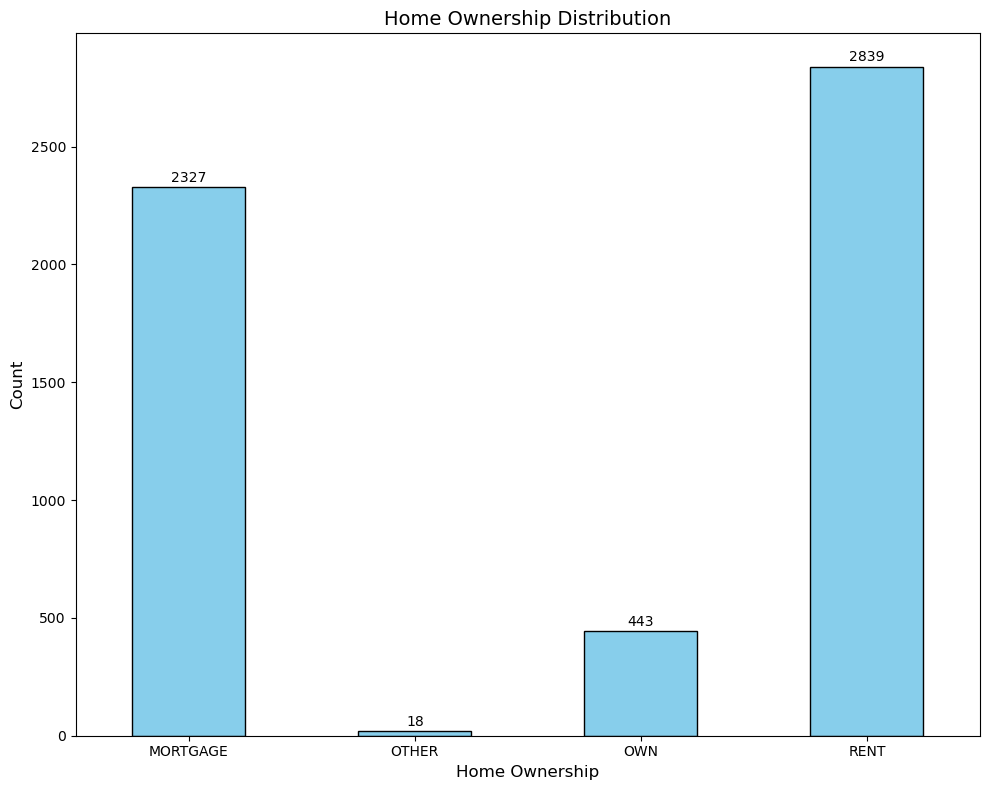

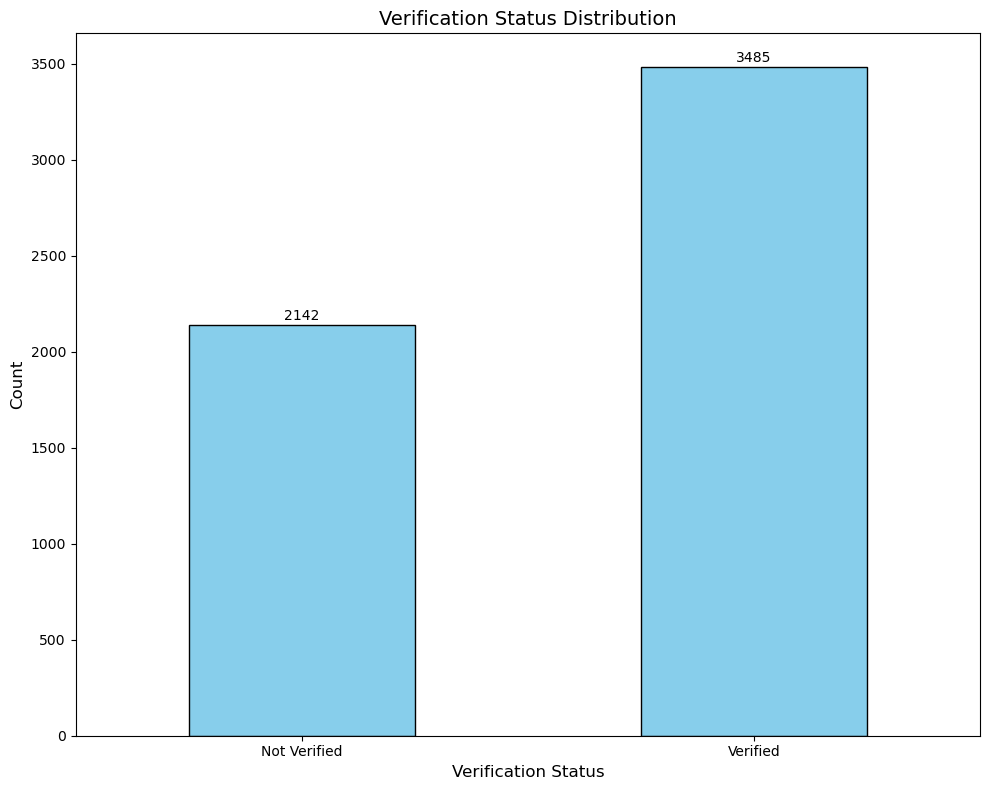

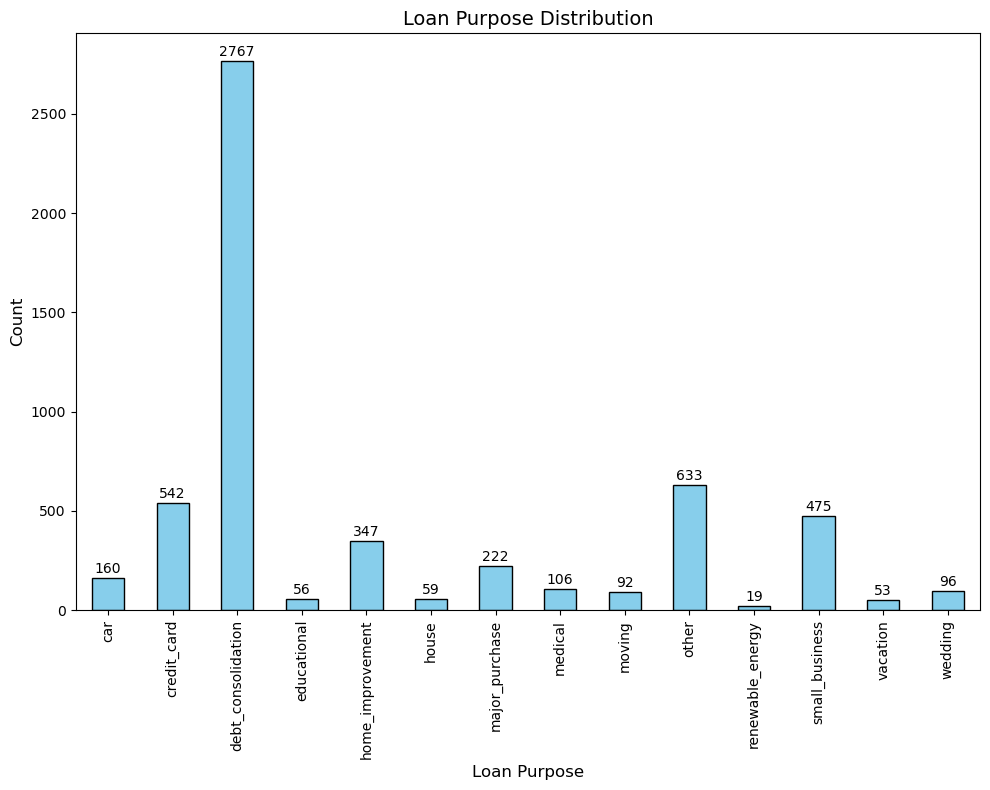

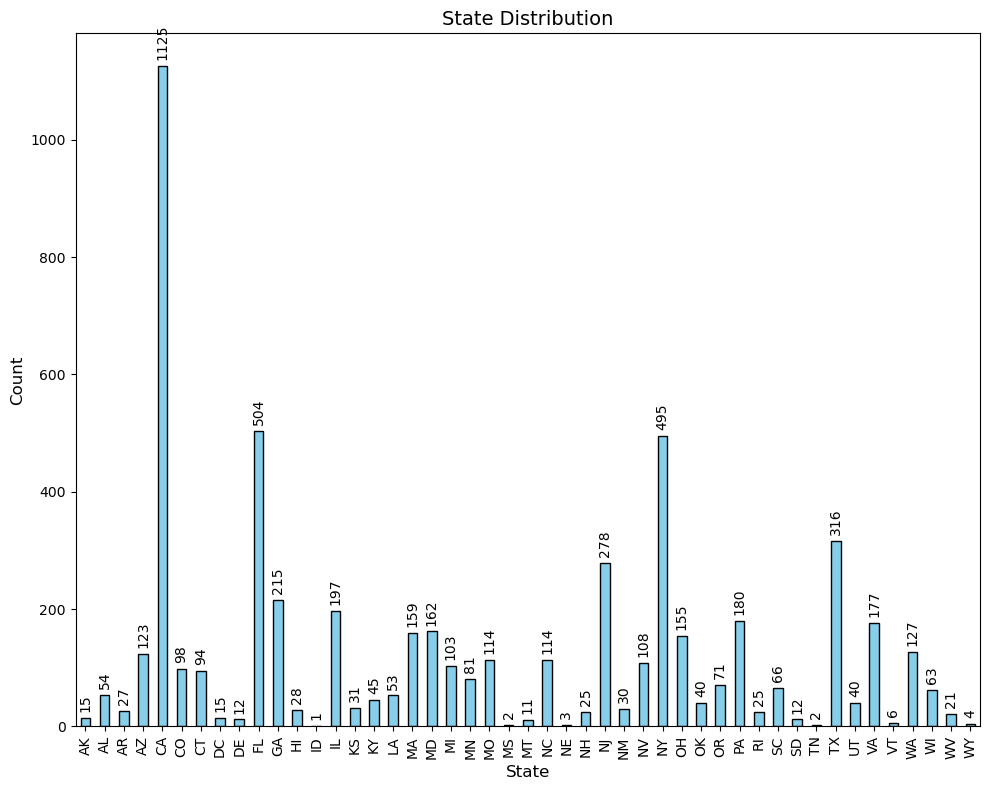

In [189]:
## Bar plot for the Univariate unordered analysis

bar_plot_function(loan_df['home_ownership'].value_counts(), 'Home Ownership Distribution', 'Home Ownership', 'Count')
bar_plot_function(loan_df['verification_status'].value_counts(), 'Verification Status Distribution', 'Verification Status', 'Count')
bar_plot_function(loan_df['purpose'].value_counts(), 'Loan Purpose Distribution', 'Loan Purpose', 'Count',90)
bar_plot_function(loan_df['addr_state'].value_counts(), 'State Distribution', 'State', 'Count',90,90)

### Observations
1. The bar chart shows that the majority of charged-off loans belong to borrowers who rent their homes. This is indicated by the significantly taller bar for "RENT" compared to the other categories.
2. The next largest group consists of borrowers who have a mortgage.
3. The bar chart shows that a significantly higher number of charged-off loans have been verified compared to those that were not verified. 
4. The bar chart shows that "debt_consolidation" is the most common loan purpose among charged-off loans. 
5. Loan purposes like "educational," "renewable_energy," and "small_business" have a very low number of observations among charged-off loans.
6. The bar chart shows that California has the highest number of charged-off loans, indicated by the tallest bar, suggesting that applicants from CA are more suspectible to default.

### Inferences
1. The high proportion of renters among charged-off loans suggests that renting might be associated with a higher risk of loan default. This could be due to various factors such as higher financial strain due to rent payments.
2. Homeowners, especially those with mortgages, might be perceived as less risky borrowers.
3. A larger proportion of verified loans are charged-off could also indicate that verification, while helpful in risk assessment, doesn't always prevent defaults.
4. The high proportion of charged-off loans for "debt_consolidation" might suggest that borrowers struggling with existing debt are more likely to default on new loans taken out to consolidate those debts.
5. Loans for "small_business" or "home_improvement" might carry higher risks due to the inherent uncertainties and potential financial challenges.
6. Applicants from CA, FL, NJ, NY and TX are expected to default frequently.

### Ordered categorical data
1. Grade of Loan (grade)
2. Sub-grade of Loan (sub_grade)
3. Term of the loan (36 / 60 months) (term)
4. Employment length of applicant (emp_length)
5. Issue year (issue_year)
6. Issue month (issue_month)

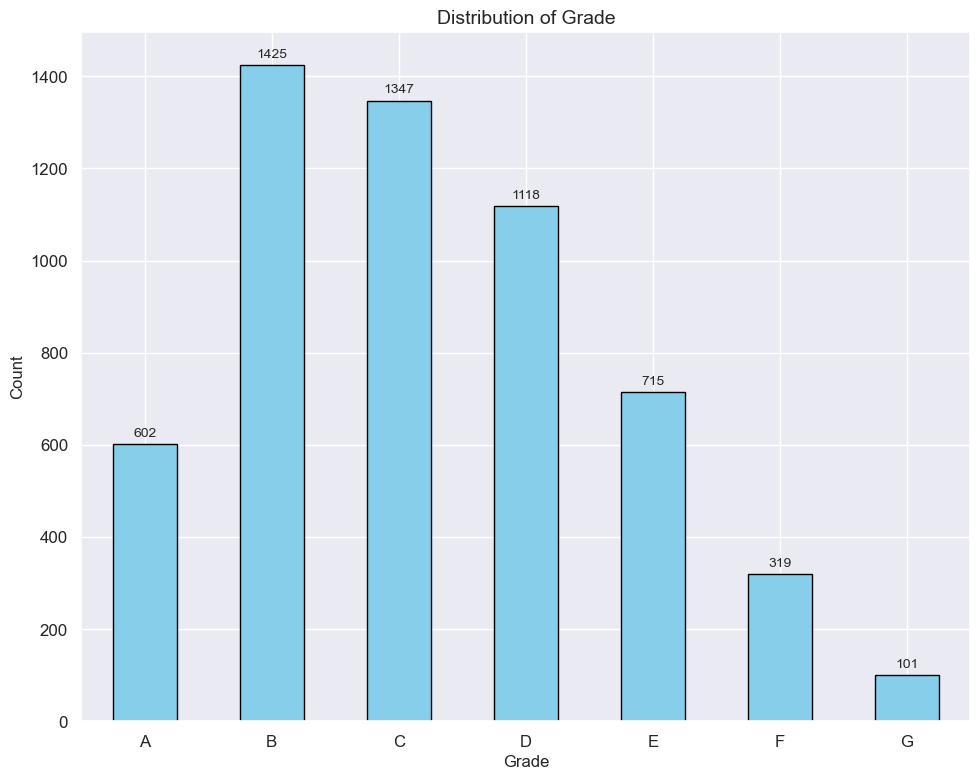

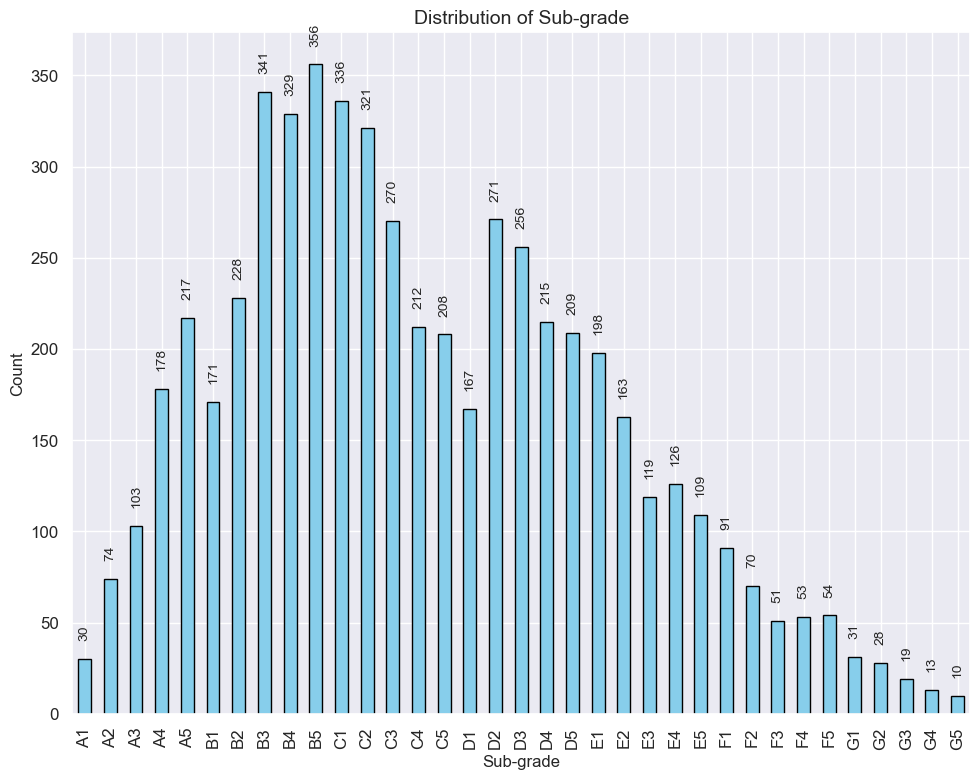

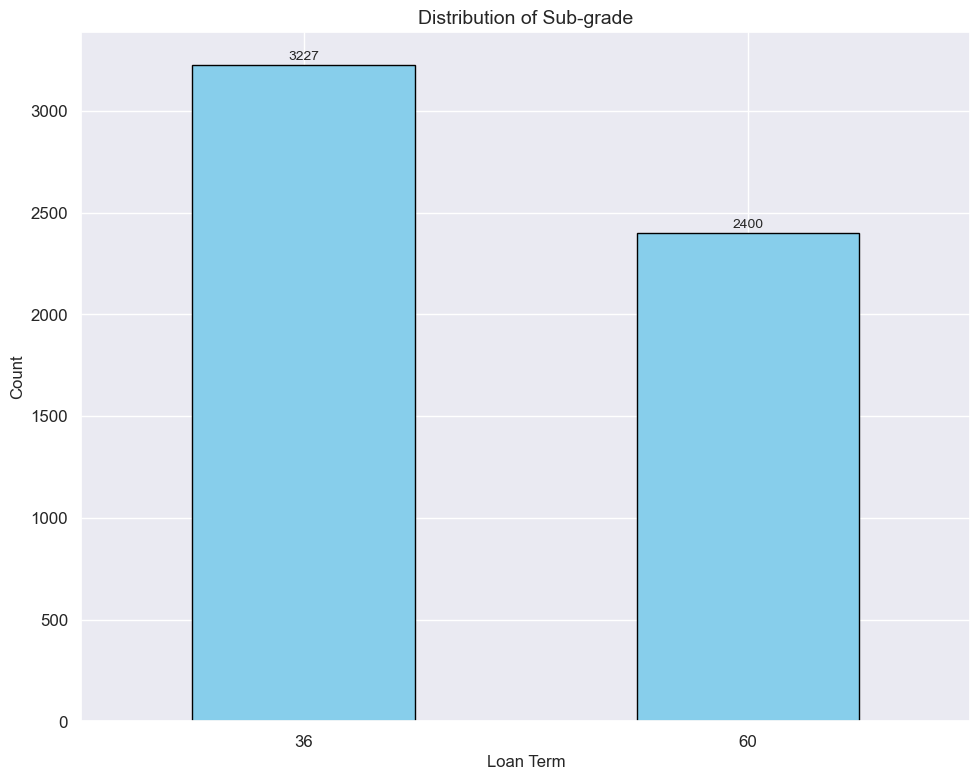

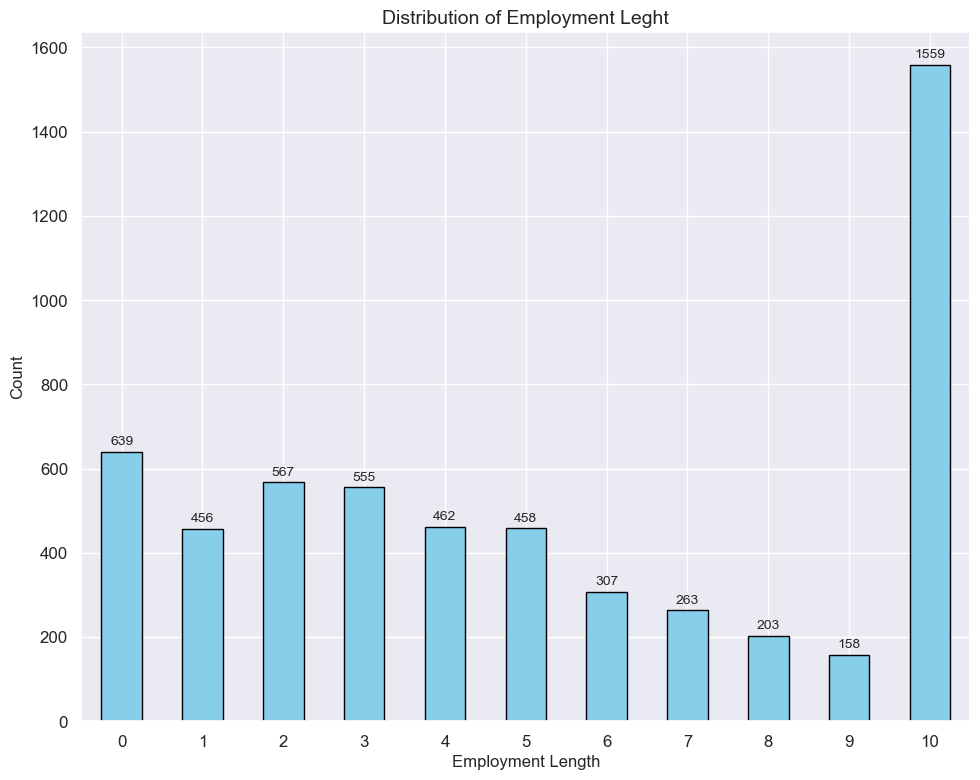

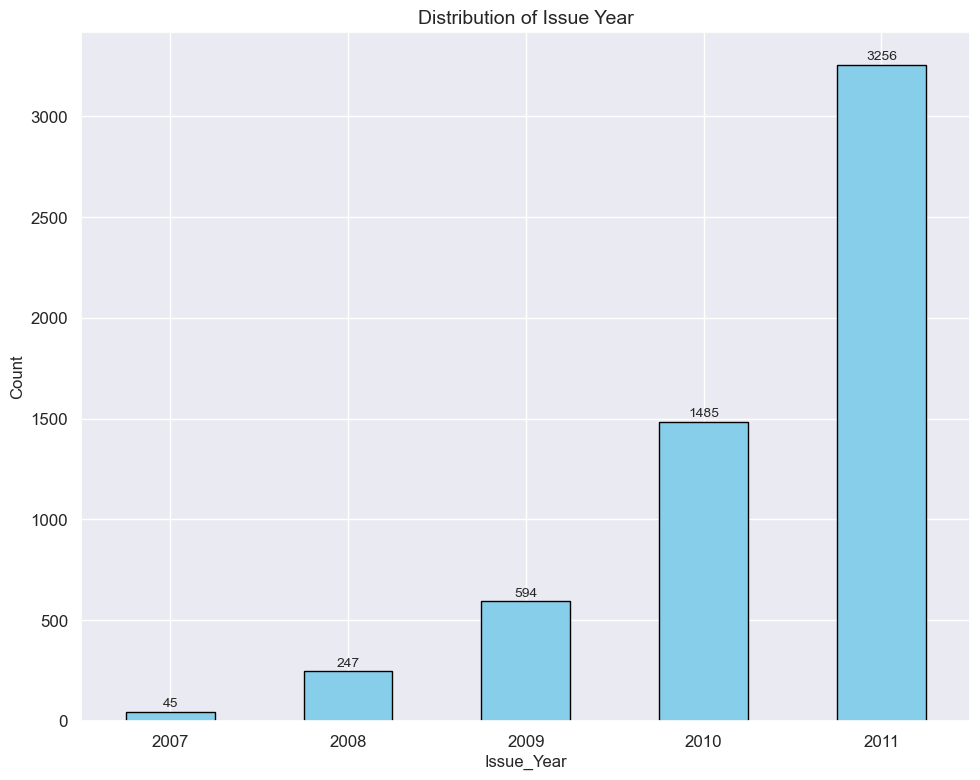

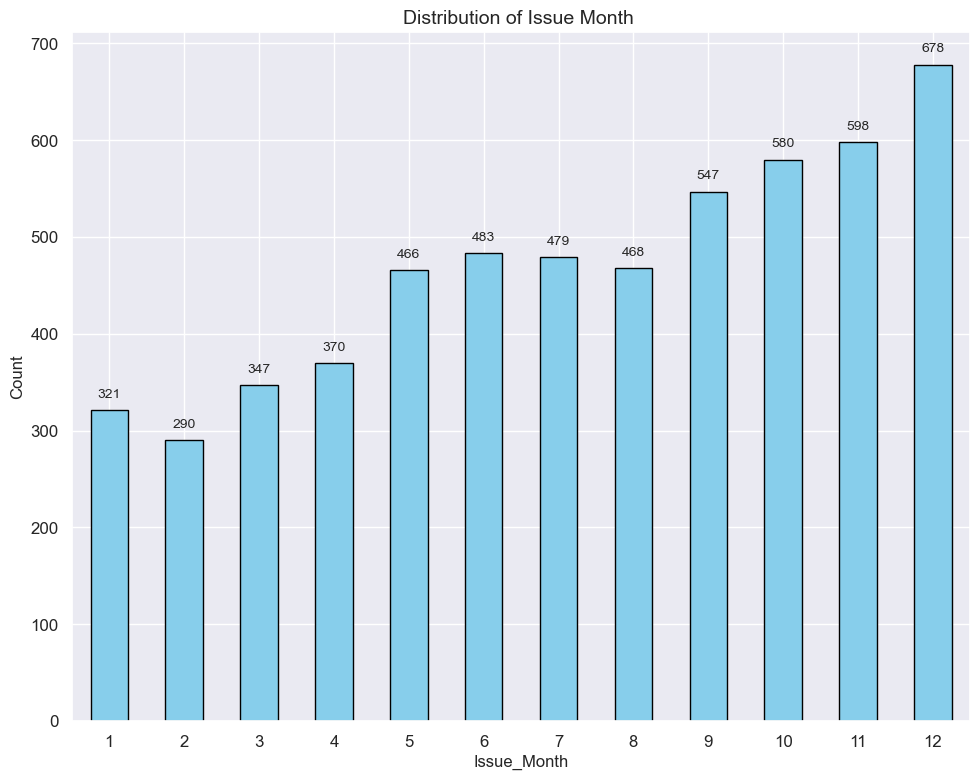

In [334]:
bar_plot_function(loan_df['grade'].value_counts(), 'Distribution of Grade', 'Grade', 'Count')
bar_plot_function(loan_df['sub_grade'].value_counts(), 'Distribution of Sub-grade', 'Sub-grade', 'Count',90,90)
bar_plot_function(loan_df['term'].value_counts(), 'Distribution of Sub-grade', 'Loan Term', 'Count')
bar_plot_function(loan_df['emp_length'].value_counts(), 'Distribution of Employment Length', 'Employment Length', 'Count')
bar_plot_function(loan_df['issue_year'].value_counts(), 'Distribution of Issue Year', 'Issue_Year', 'Count')
bar_plot_function(loan_df['issue_month'].value_counts(), 'Distribution of Issue Month ', 'Issue_Month', 'Count')

### Observations 
1. The bar chart shows that Grade B has the highest number of charged-off loans, indicated by the tallest bar.
2. Grades C and D also have a significant number of charged-off loans, indicating that these grades are also associated with a higher risk of default.
3. Sub-grade B4 have the highest number of defaulters.
4. The loans of 36months term are expected to default more.
5. The applicants with 10yr employment length tend to default more followed by 0 years.
6. The loans issued in 2011 have defaulted more, followed by 2010. There is a constant upward trend from 2007 to 2011
7. Loans issued in month of December tend to default more, followed by November and October

### Inferences
1. The Loan grades B,C,D have higher tendency to default. This is likely due to the fact that lower grades are assigned to loans with higher perceived risk.
2. The sub-grades B3,B4,B5,C1,C2 have higher defaulting rate. Further, subgrades A1, A2, A3 have least default rate
3. The loans of 36months default more, indicating applicants with short duration loans tend to turn into defaulters.
4. Employment length of 10 yrs tend to default more which might be due to the reason that the number of loans given are more to these types of applicants
5. Employment length indicates that loans to applicants who are new to jobs are second highest in default.
6. The distribution for "Issue Year" indicates that loan defaulters are more in 2011, but from the trend it seems like this might be due to the more loans given year or year due to increased business.
7. The "Issue Month" distribution indicates that loans granted in the last quarter of the year tend to default more, which might be due to the financial stress at the end of year.


### Quantitative Univariate Analysis
1. Loan Amount (loan_amnt)
2. Funded Amount (funded_amnt)
3. Interest Rate (int_rate)
4. Monthly Installments (installment)
5. Annual Income of applicant (annual_inc)
6. Debt-Income Ratio (dti)
6. Delinquencies in 2yrs (delinq_2yrs)
7. Number of open credit line (open_acc)
8. Inquiries in last 6 months (inq_last_6mths)
9. Revolving Balance (revol_bal)
10. Total Payment (total_pymnt)
11. Total Payment funded by investors (total_pymnt_inv)


In [363]:
def box_plot_function(data, title, xlabel):
    """
    Function plots boxplot uding sns.boxplot library

    Parameters :
    data - dataframe
    title - Title of the Plot
    xlabel - Label of the X-axis

    """
    plt.figure(figsize=(20, 6))
    sns.boxplot(x=data, color='green')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.show()

def histogram_plot_function(data, title, xlabel, totbins=20):
    """
    Function to plot the histogram plot 
    Parameters :
    data - Dataframe variable
    title - Title of Plot
    xlabel - Label for X-axis
    totbins - Total Bins in histogram. Default is 20
    
    """
    plt.figure(figsize=(10, 6))
    sns.histplot(data, bins=totbins, kde=True, color='blue')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel('Frequency')
    plt.show()
    

count     5627.000000
mean     12104.385108
std       8085.732038
min        900.000000
25%       5600.000000
50%      10000.000000
75%      16500.000000
max      35000.000000
Name: loan_amnt, dtype: float64


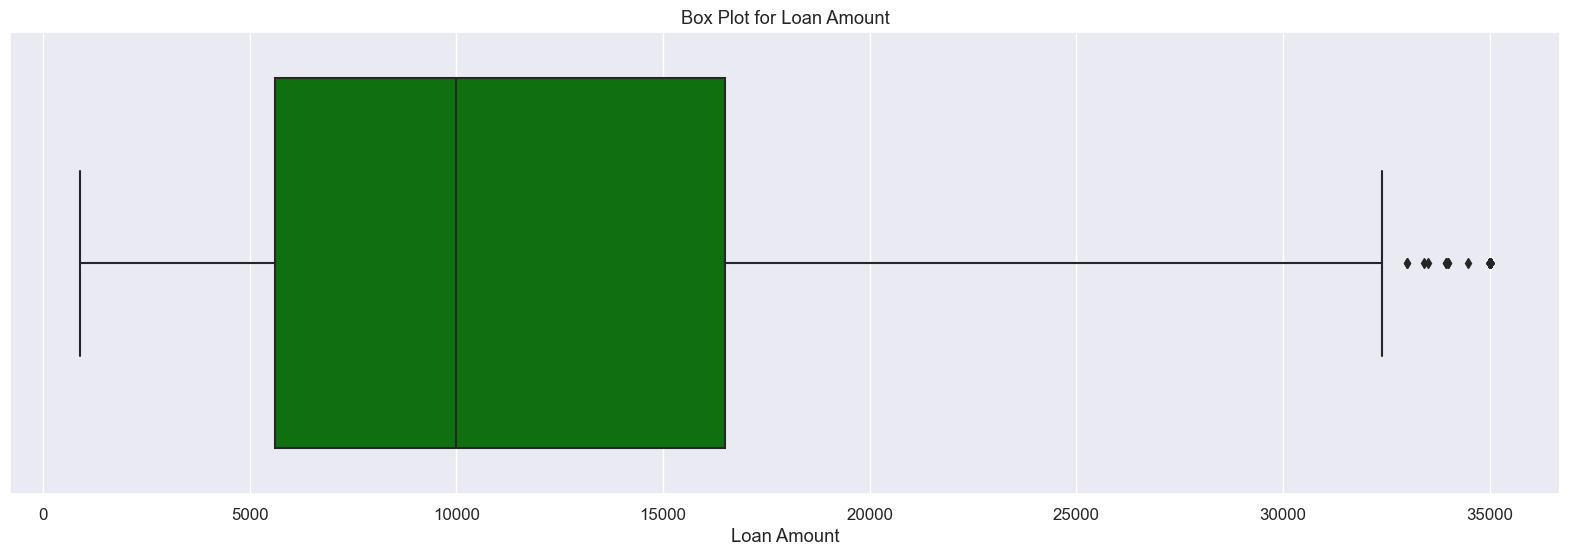

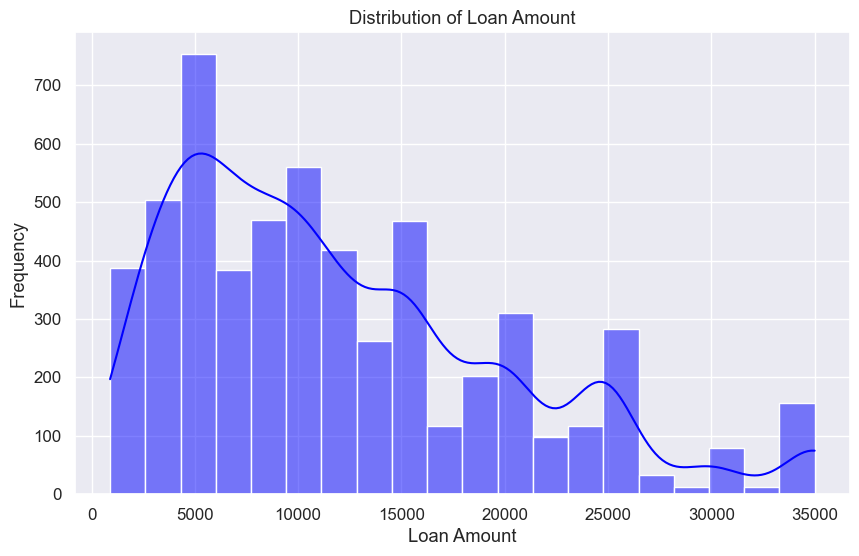

In [364]:
# Quantitative distribution of data
print(loan_df['loan_amnt'].describe())
# Box plots for the loan_amnt
box_plot_function(loan_df['loan_amnt'],'Box Plot for Loan Amount', 'Loan Amount')
# Histogram 
histogram_plot_function(loan_df['loan_amnt'],'Distribution of Loan Amount', 'Loan Amount')

Observation
1. The median loan amount for charged-off loans appears to be around 10,000.
2. IQR is relatively wide, suggesting a significant spread in loan amounts for charged-off loans
3. The box plot reveals that charged-off loans are not concentrated around a single value. There is a wide range of loan amounts, with some loans being significantly larger than others.
4. The presence of outliers on the higher end of the distribution suggests that larger loan amounts might be associated with a higher risk of default. Borrowers with larger loans might face greater financial strain, making it more difficult for them to repay the debt

count    5627.000000
mean       13.820432
std         3.654413
min         5.420000
25%        11.310000
50%        13.610000
75%        16.400000
max        24.400000
Name: int_rate, dtype: float64


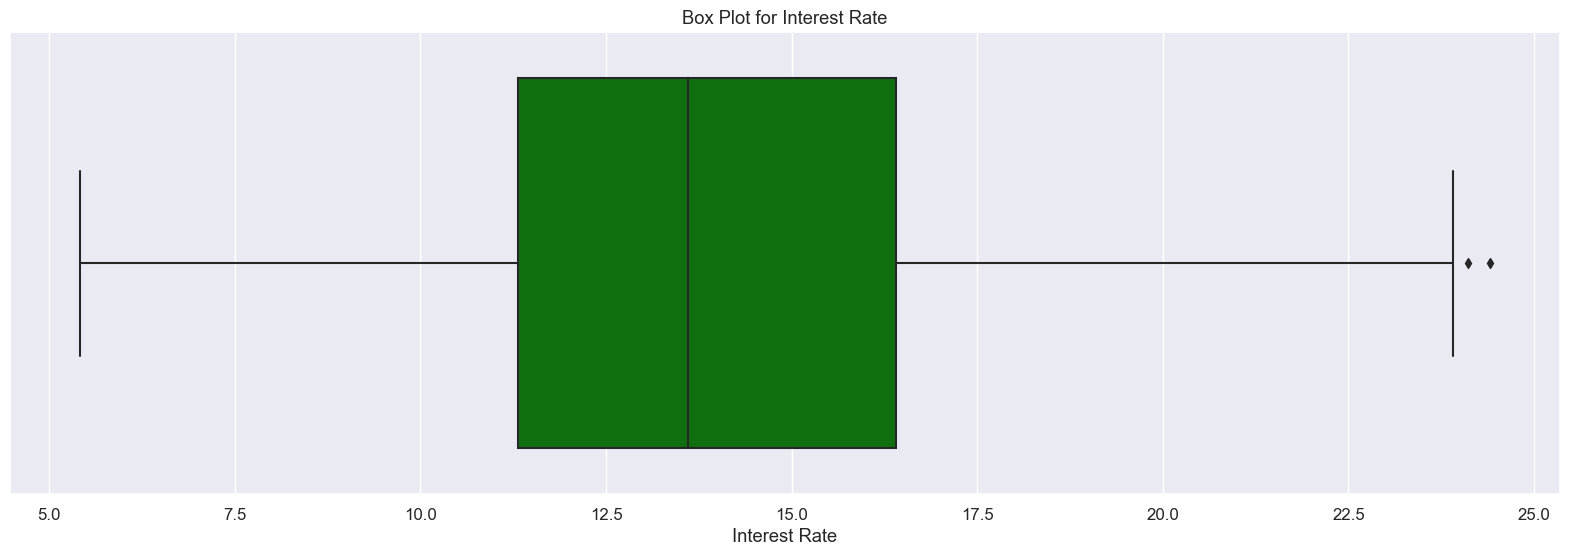

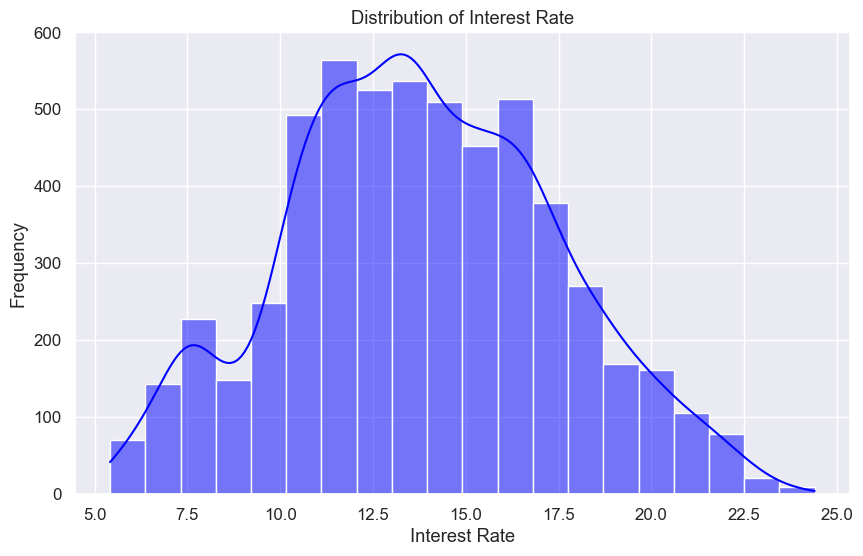

In [365]:
# Quantitative distribution of int_rate dataset
print(loan_df['int_rate'].describe())
# Box plots for the int_rate
box_plot_function(loan_df['int_rate'],'Box Plot for Interest Rate', 'Interest Rate')
# Histogram 
histogram_plot_function(loan_df['int_rate'],'Distribution of Interest Rate', 'Interest Rate')

Observation
1. The median interest rate for charged-off loans is approximately 13.61%. This represents the 50th percentile, meaning half of the charged-off loans have interest rates below this value, and half have interest rates above it.
2. Whiskers represent the lower and upper bound. The minimum value is 5.42% and the maximum is 24.40%.
3. The data suggests that charged-off loans tend to have higher interest rates compared to loans that are not charged off. More than 50% loans are defaulted which have interest rate more than 13.6%.
4. The firm may consider using interest rate as a factor in assessing the risk of loan default. Loans with higher interest rates might be associated with a higher likelihood of being charged off.

count    5627.000000
mean      336.175006
std       217.051841
min        22.790000
25%       168.555000
50%       293.870000
75%       457.840000
max      1305.190000
Name: installment, dtype: float64


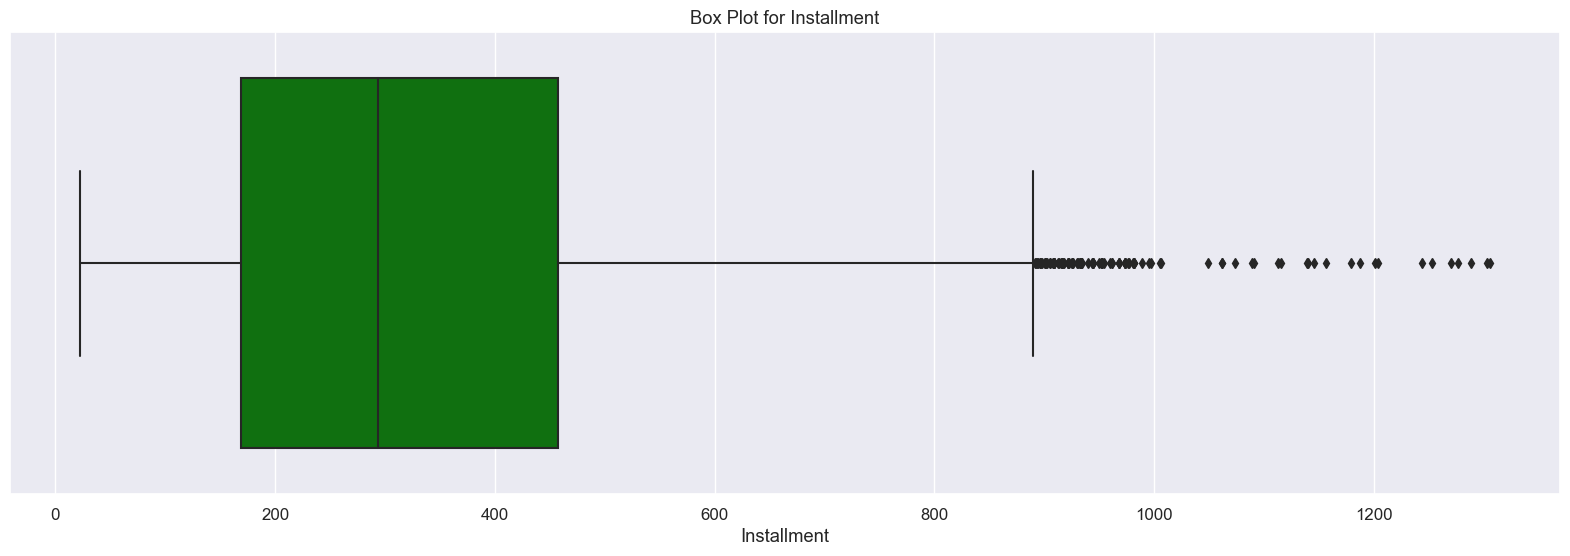

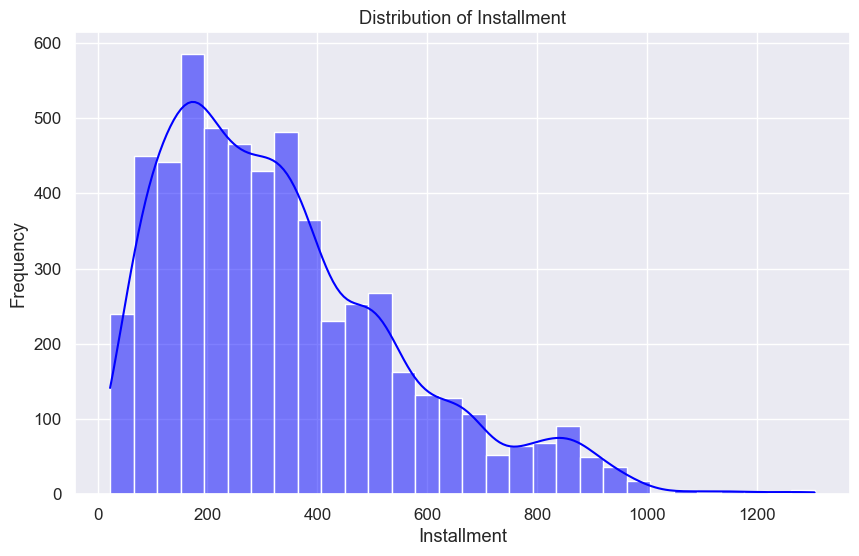

In [366]:
# Quantitative distribution of installment dataset
print(loan_df['installment'].describe())
# Box plots for the installment
box_plot_function(loan_df['installment'],'Box Plot for Installment', 'Installment')
#Histogram
histogram_plot_function(loan_df['installment'],'Distribution of Installment', 'Installment',30)

Observation
1. The box plot reveals a right-skewed distribution of installment amounts for charged-off loans.
2. Whiskers represent the lower and upper bound. the minimum value is 22.79 and the maximum is 1305.19
3. The data suggests that charged-off loans tend to have higher installment amounts compared to loans that are not charged off.
4. Consider using installment amount as a factor in assessing the risk of loan default. Loans with higher installment amounts might be associated with a higher likelihood of being charged off.

count    5.627000e+03
mean     6.242730e+04
std      4.777601e+04
min      4.080000e+03
25%      3.700000e+04
50%      5.300000e+04
75%      7.500000e+04
max      1.250000e+06
Name: annual_inc, dtype: float64


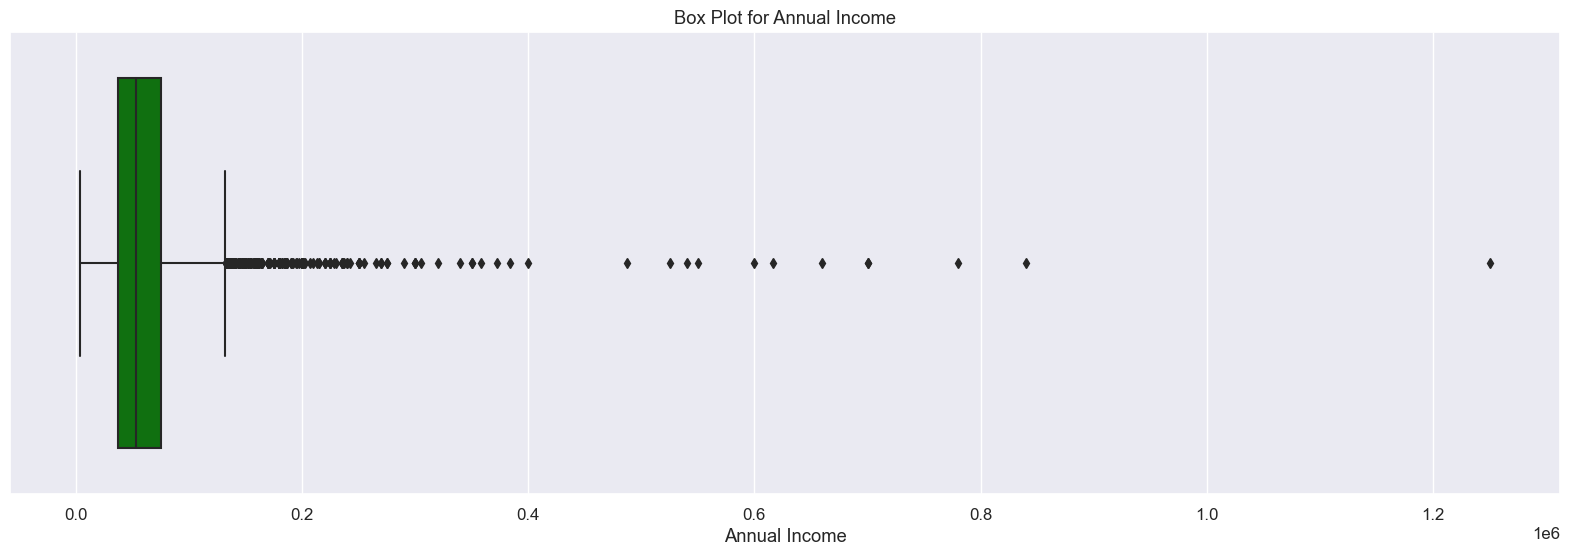

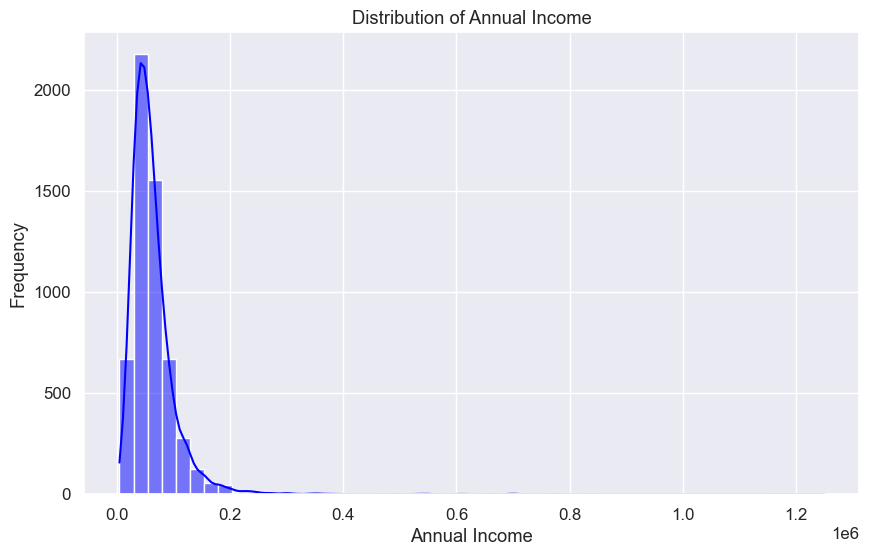

In [367]:
# Quantitative distribution of annual_inc dataset
print(loan_df['annual_inc'].describe())
# Box plots for the annual_inc
box_plot_function(loan_df['annual_inc'],'Box Plot for Annual Income', 'Annual Income')
# Histogram
histogram_plot_function(loan_df['annual_inc'],'Distribution of Annual Income', 'Annual Income',50)

count      5367.000000
mean      55676.891137
std       25516.521797
min        4080.000000
25%       36000.000000
50%       51200.000000
75%       70000.000000
max      132000.000000
Name: annual_inc, dtype: float64


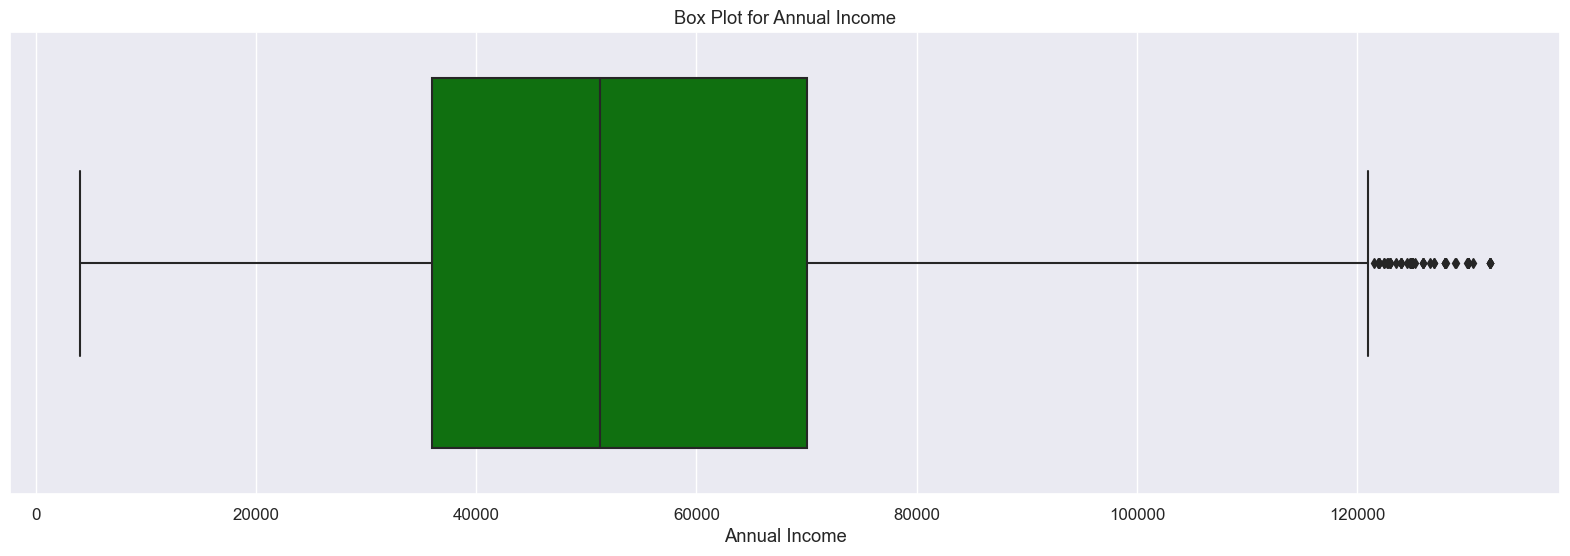

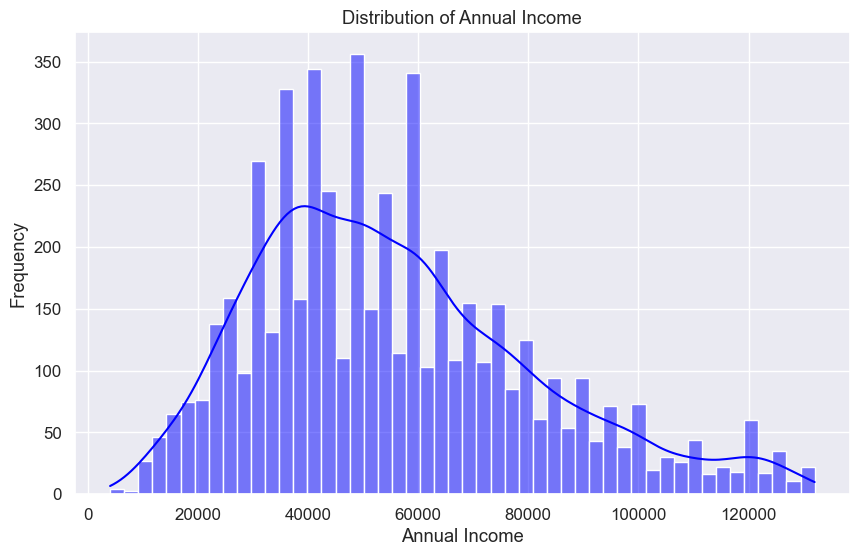

In [368]:
# Since there are many outliers, replotting the Annual Income after removing the outliers.
# Calculate IQR
Q1 = np.percentile(loan_df['annual_inc'], 25)
Q3 = np.percentile(loan_df['annual_inc'], 75)
IQR = Q3 - Q1

# Define threshold (e.g., 1.5 times IQR)
threshold = 1.5

# Remove outliers based on IQR
filtered_df = loan_df[~((loan_df['annual_inc'] < (Q1 - threshold * IQR)) | (loan_df['annual_inc'] > (Q3 + threshold * IQR)))]
# Quantitative distribution of annual_inc dataset
print(filtered_df['annual_inc'].describe())
# Box plots for the annual_inc
box_plot_function(filtered_df['annual_inc'],'Box Plot for Annual Income', 'Annual Income')
#Histogram
histogram_plot_function(filtered_df['annual_inc'],'Distribution of Annual Income', 'Annual Income',50)


Observation
1. The box plot reveals a right-skewed distribution of annual income for charged-off loans. Also there are many outliers after the higher bound.
2. The median annual income is approximately 51200.
2. Whiskers represent the lower and upper bound. The minimum value is 4080 and the maximum is 132000.
3. Despite higher incomes in some cases, the loans were still charged off. This suggests income alone may not be a strong predictor of creditworthiness or repayment capability
5. Removing outliers gives better distribution of the box plot. However there is no effect on the median values. We see that the mean has come down significantly.

count    5627.000000
mean       14.000624
std         6.585577
min         0.000000
25%         9.050000
50%        14.290000
75%        19.290000
max        29.850000
Name: dti, dtype: float64


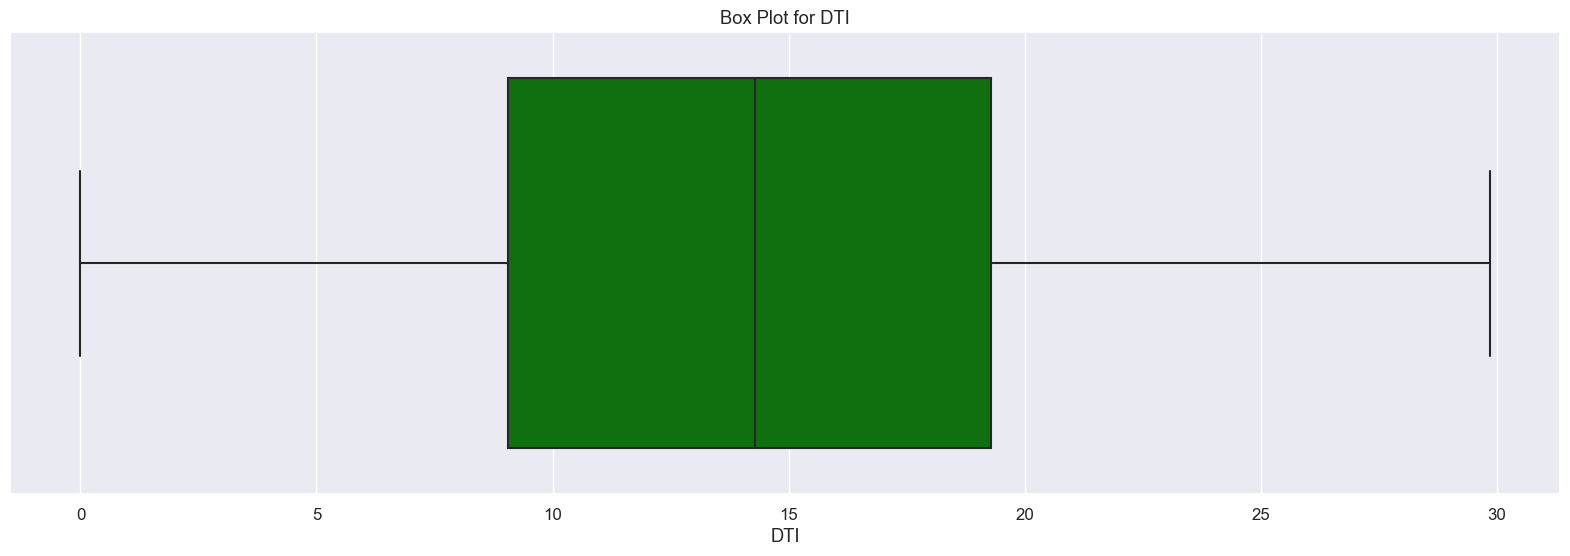

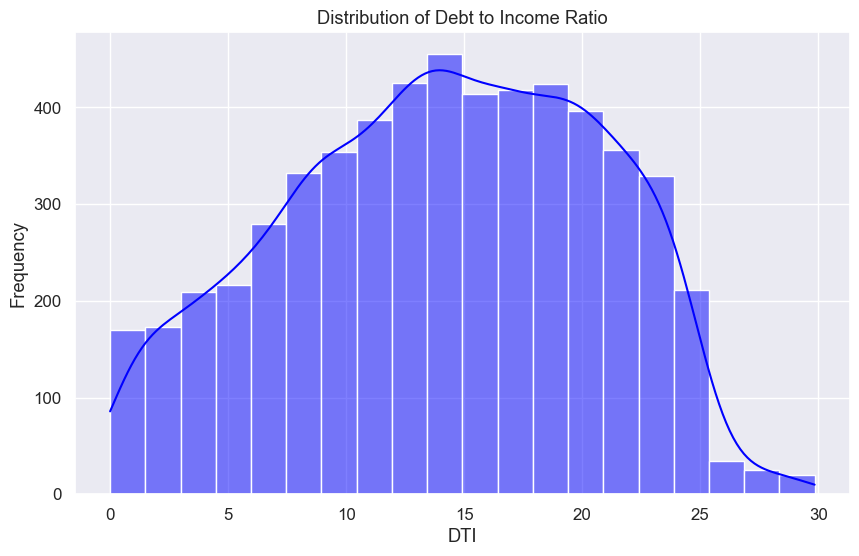

In [369]:
# Quantitative distribution of dti dataset
print(loan_df['dti'].describe())
# Box plots for the dti
box_plot_function(loan_df['dti'],'Box Plot for DTI', 'DTI')
# Histogram
histogram_plot_function(loan_df['dti'],'Distribution of Debt to Income Ratio', 'DTI')

Observations
1. The median DTI is approximately 14.29%. 
2.  The whiskers extend to the minimum and maximum values within 1.5 times the IQR from the first and third quartiles, respectively. In this case, the minimum value is 0.00% and the maximum value is 29.85%.
3. The data suggests that charged-off loans tend to have higher DTI values. More than 50% of loans have defaulted which have DTI of 14.29 and above.
4. Loans with higher DTI values might be associated with a higher likelihood of being charged off.

count    5627.000000
mean        0.170606
std         0.534986
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         8.000000
Name: delinq_2yrs, dtype: float64


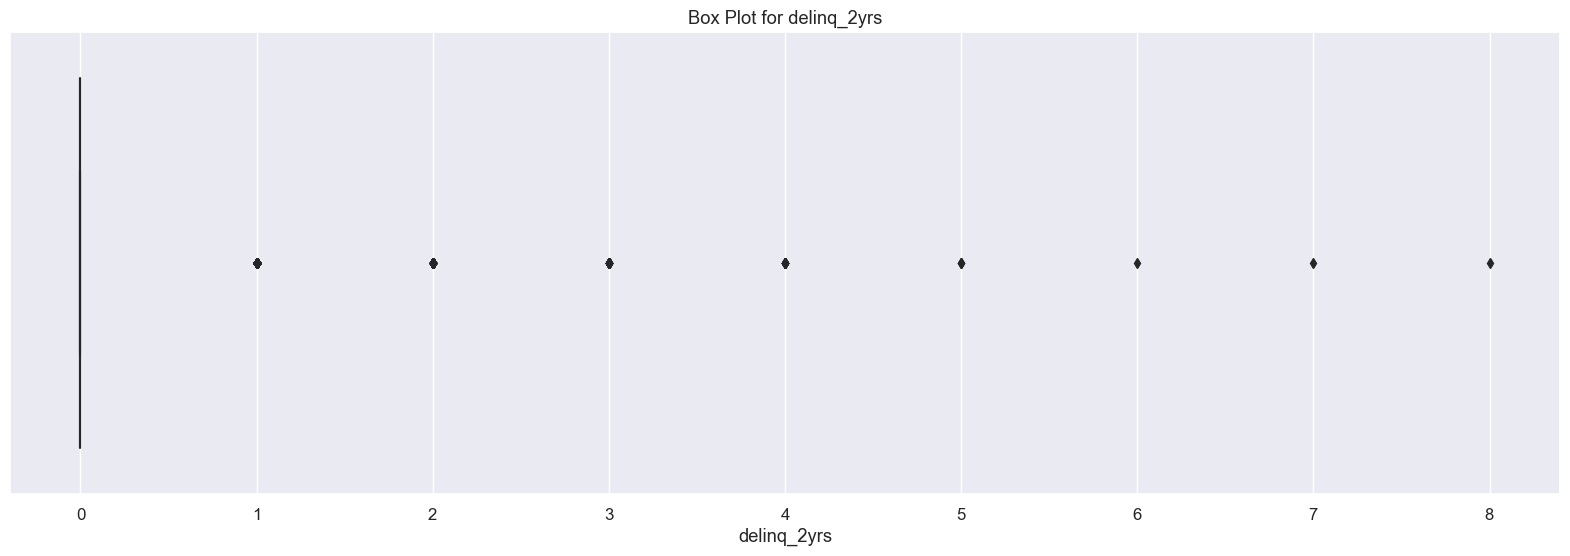

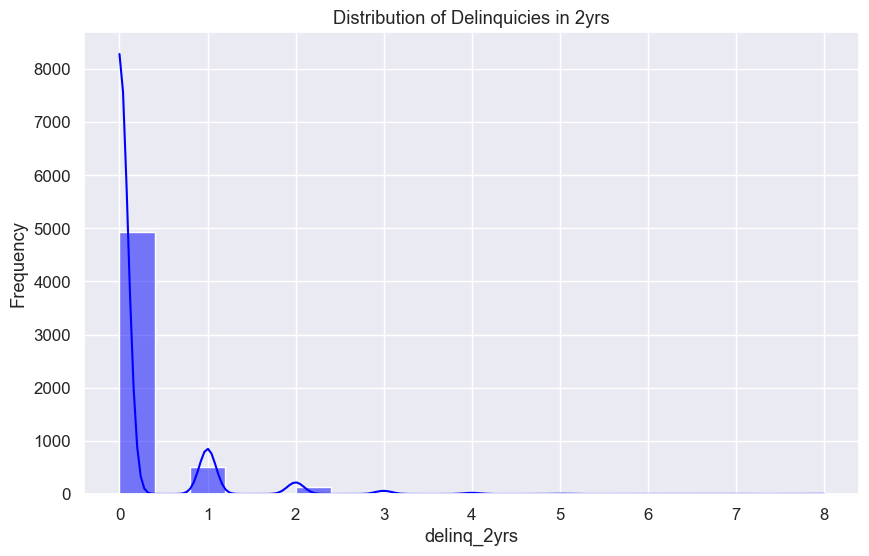

In [370]:
# Quantitative distribution of delinq_2yrs dataset
print(loan_df['delinq_2yrs'].describe())
# Box plots for the delinq_2yrs
box_plot_function(loan_df['delinq_2yrs'],'Box Plot for delinq_2yrs', 'delinq_2yrs')
# Histogram
histogram_plot_function(loan_df['delinq_2yrs'],'Distribution of Delinquicies in 2yrs', 'delinq_2yrs')

Observation
1. We see all the major data indicators like 25%, 50%, 75% are all 0.
2. IQR is 0
3. The data suggests that a majority of charged-off loans have a low number of delinquicies public records in the last 2 years.
4. The dataset indicates that no delinquicies within 2yrs does not effect the defaulters.

count    5627.000000
mean        9.178070
std         4.525937
min         2.000000
25%         6.000000
50%         8.000000
75%        12.000000
max        38.000000
Name: open_acc, dtype: float64


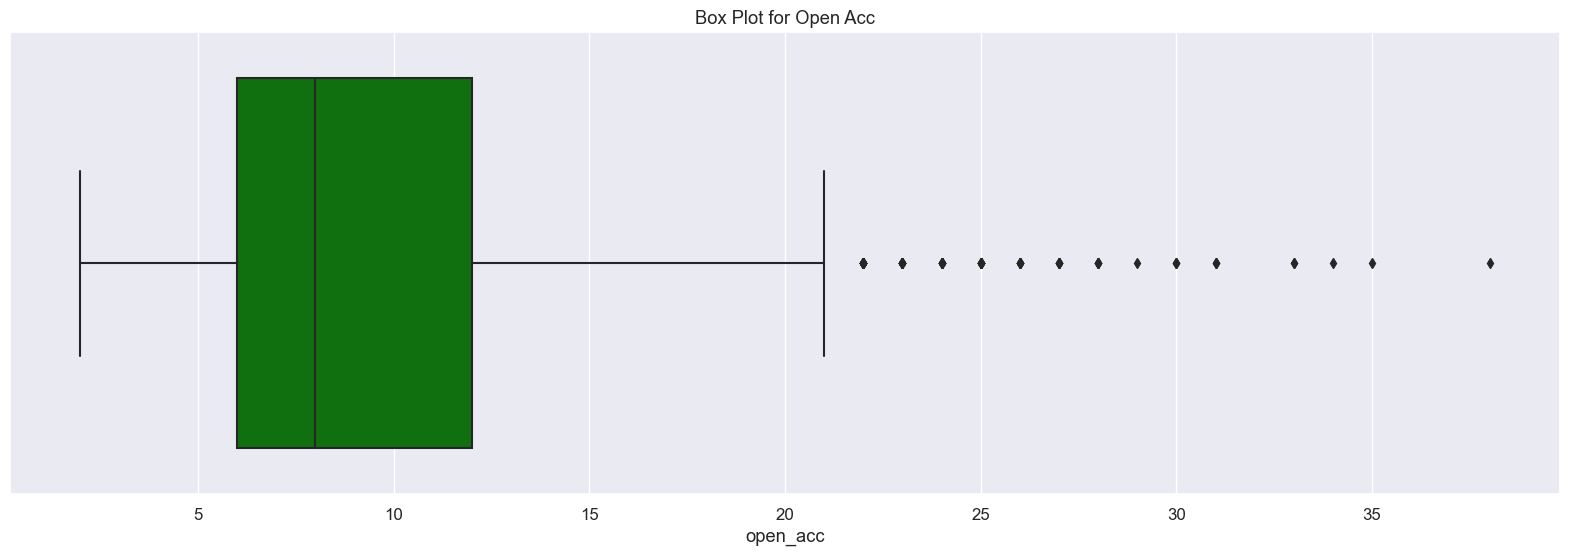

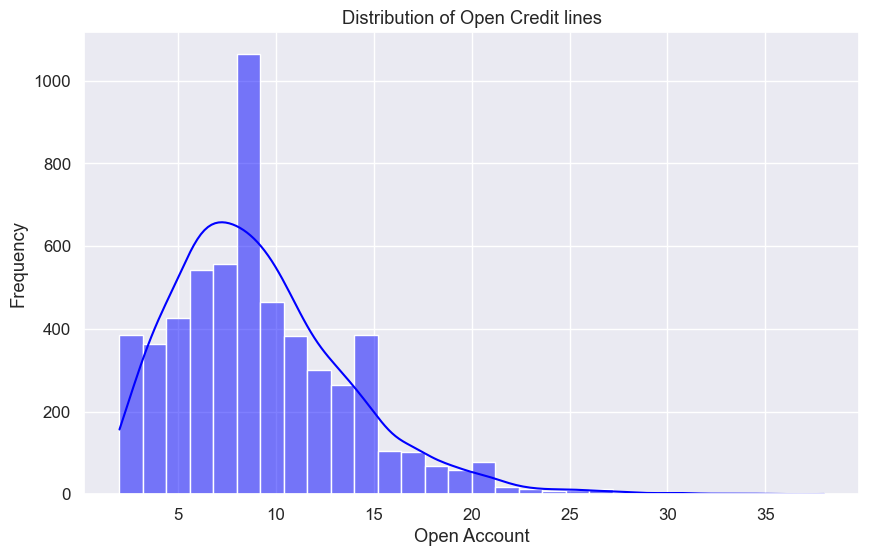

In [371]:
# Quantitative distribution of open_acc dataset
print(loan_df['open_acc'].describe())
# Box plots for the open_acc
box_plot_function(loan_df['open_acc'],'Box Plot for Open Acc', 'open_acc')
# Historgram
histogram_plot_function(loan_df['open_acc'],'Distribution of Open Credit lines', 'Open Account', 30)

Observations
1. The median open_acc is 8. This means that half of the charged-off loans have 8 or fewer open credit lines, and half have more than 8
2. The data suggests that charged-off loans tend to have a higher number of open credit lines compared to loans that are not charged off. 
3. Loans with a higher number of open credit lines might be associated with a higher likelihood of being charged off.

count    5627.000000
mean        1.058113
std         1.154136
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max         8.000000
Name: inq_last_6mths, dtype: float64


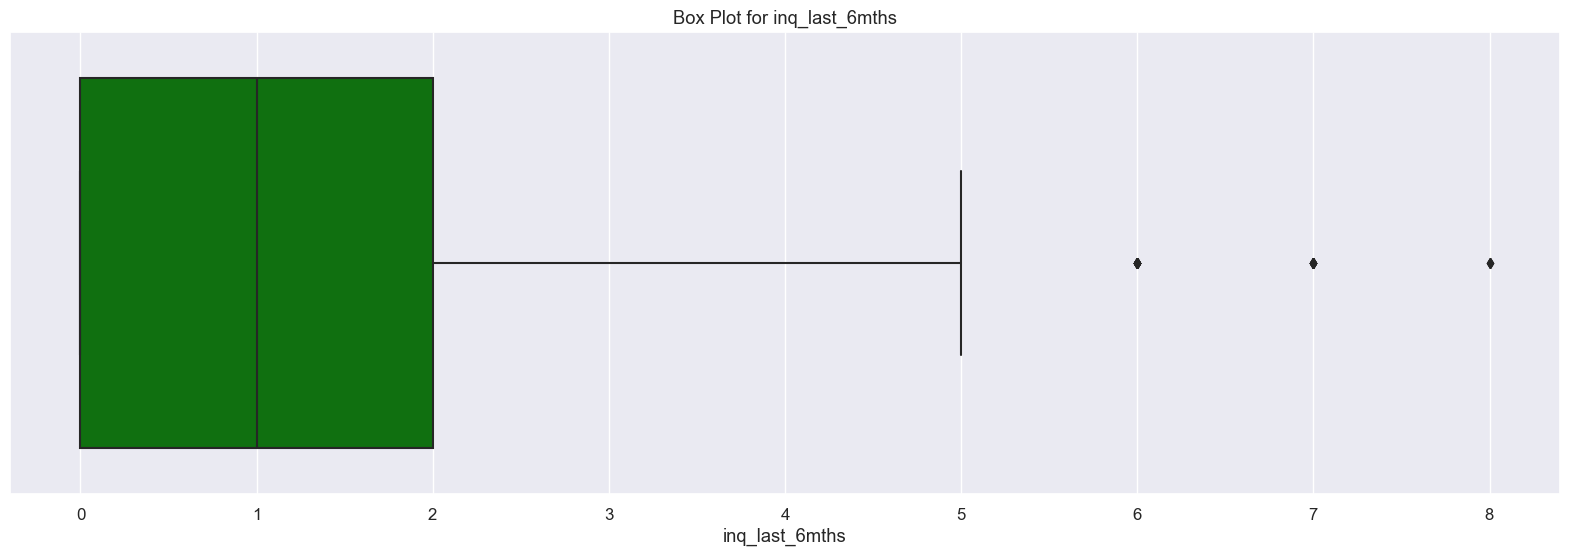

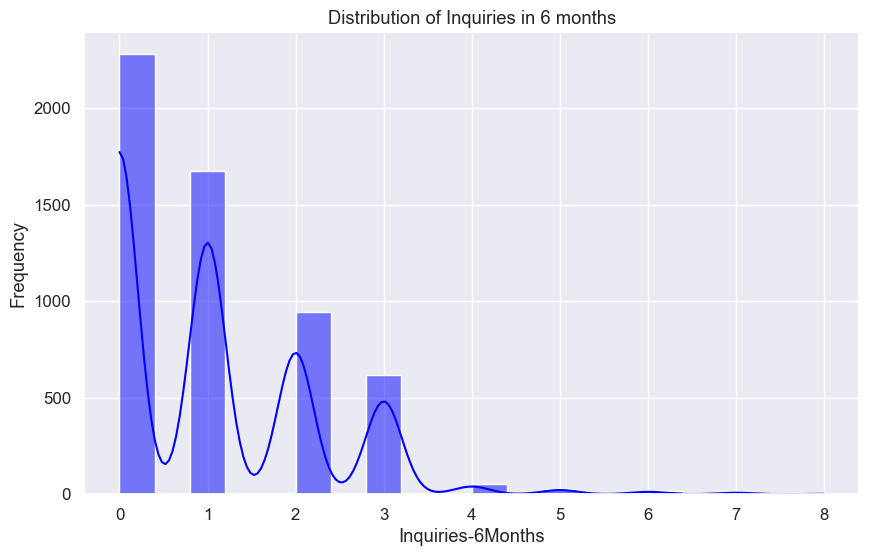

In [372]:
# Quantitative distribution of inq_last_6mths dataset
print(loan_df['inq_last_6mths'].describe())
# Box plots for the inq_last_6mths
box_plot_function(loan_df['inq_last_6mths'],'Box Plot for inq_last_6mths', 'inq_last_6mths')
# Historgram
histogram_plot_function(loan_df['inq_last_6mths'],'Distribution of Inquiries in 6 months', 'Inquiries-6Months')

Observations
1. The 50% percentile is at 1 and 75% is at 2. This means applicants with low inquiries can expected to default more.
2. The IQR, represented by the height of the box, is 2 - 0 = 2. This signifies that 50% of the charged-off loans had 0 to 2 inquiries in the last 6 months.
3. A significant portion of charged-off loans had very few inquiries in the last 6 months. The median being 0 and the IQR being 2 further supports this observation.

count      5627.000000
mean      13514.243647
std       15164.117475
min           0.000000
25%        3968.000000
50%        9211.000000
75%       17518.000000
max      148829.000000
Name: revol_bal, dtype: float64


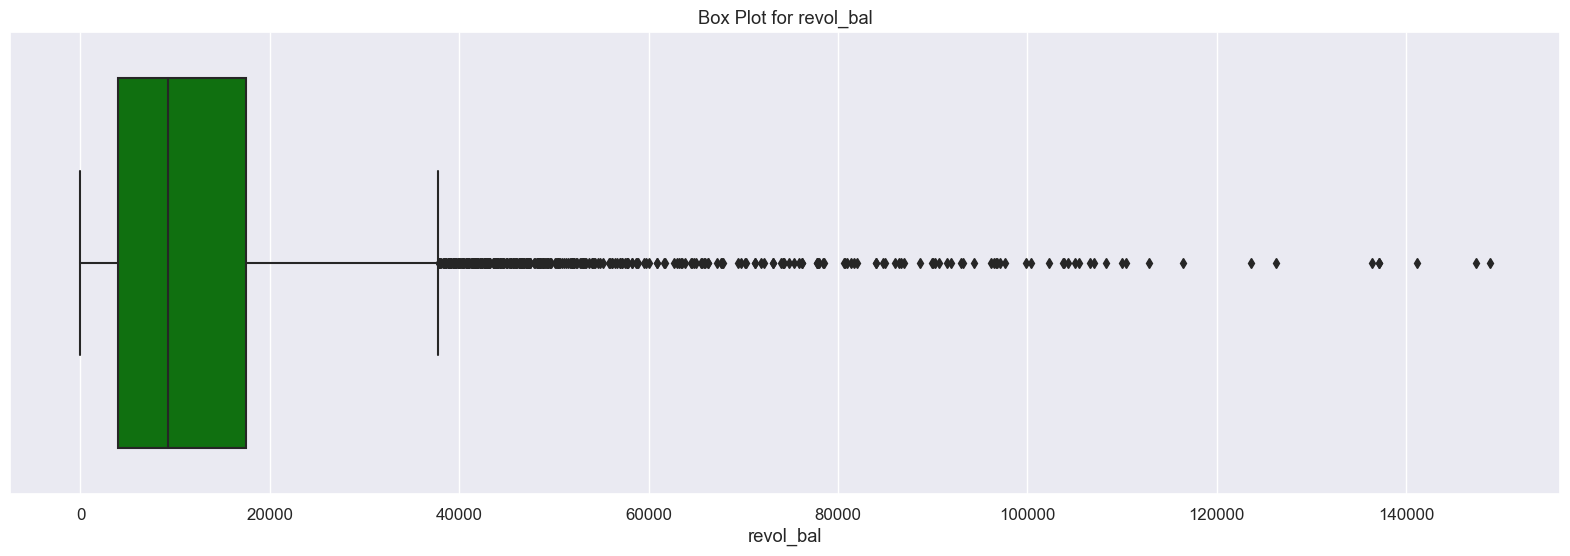

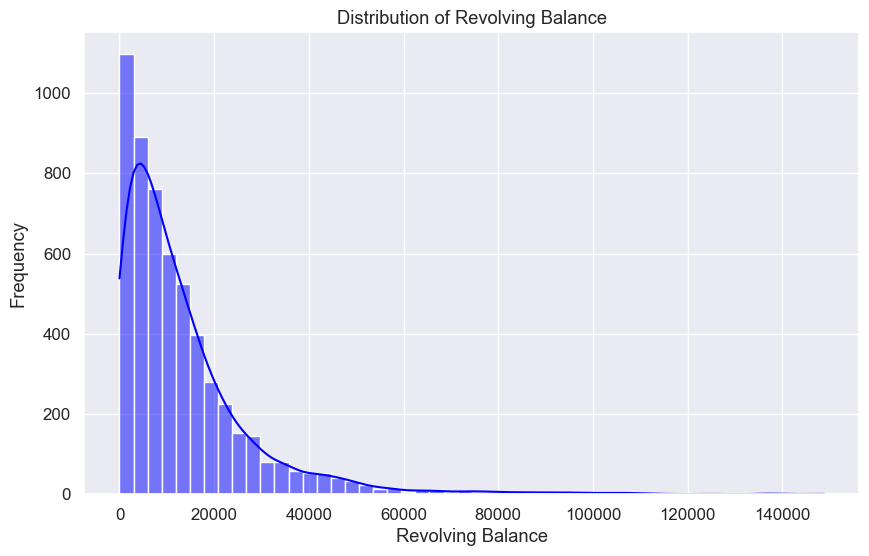

In [373]:
# Quantitative distribution of revol_bal dataset
print(loan_df['revol_bal'].describe())
# Box plots for the revol_bal
box_plot_function(loan_df['revol_bal'],'Box Plot for revol_bal', 'revol_bal')
# Histogram
histogram_plot_function(loan_df['revol_bal'],'Distribution of Revolving Balance', 'Revolving Balance', 50)

Observation
1. The median revol_bal is around 9,211. This means that half of the charged-off loans have a revolving balance below this amount
2. The IQR, is approximately 13550. This indicates that 50% of the charged-off loans have revolving balances within this range.
3. There are many outliers.

count     5280.000000
mean     10598.429735
std       8703.948528
min          0.000000
25%       3713.500000
50%       8498.000000
75%      15645.000000
max      37725.000000
Name: revol_bal, dtype: float64


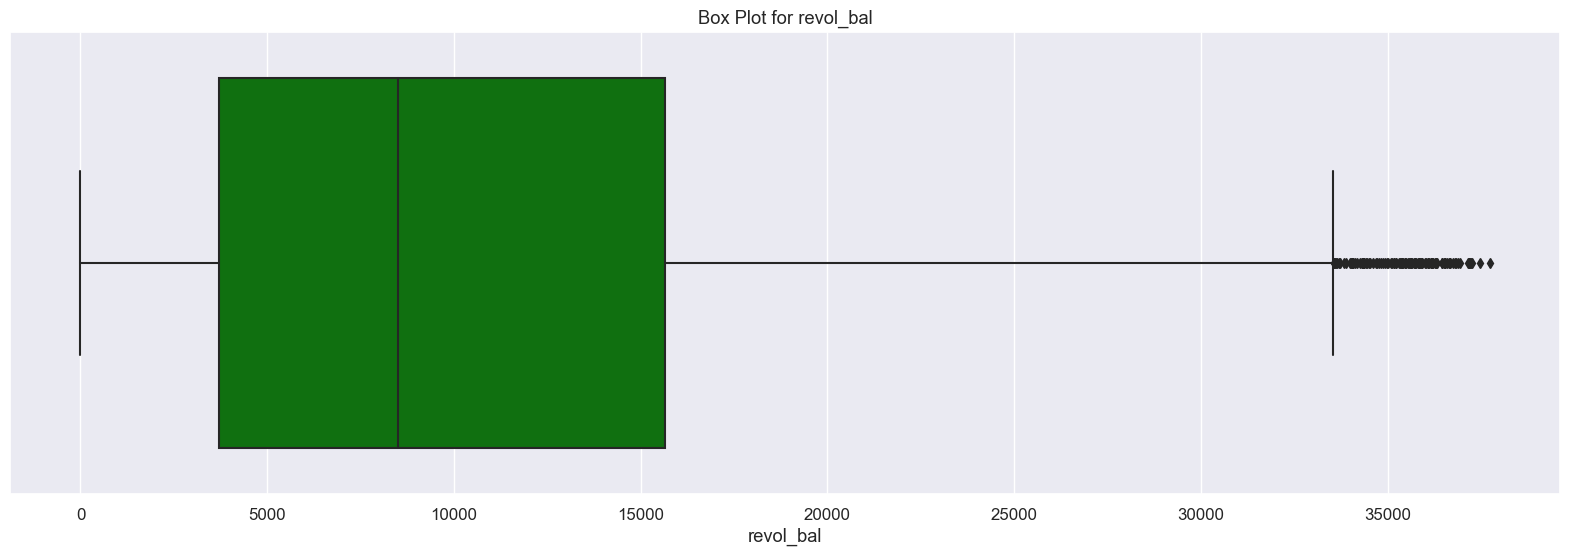

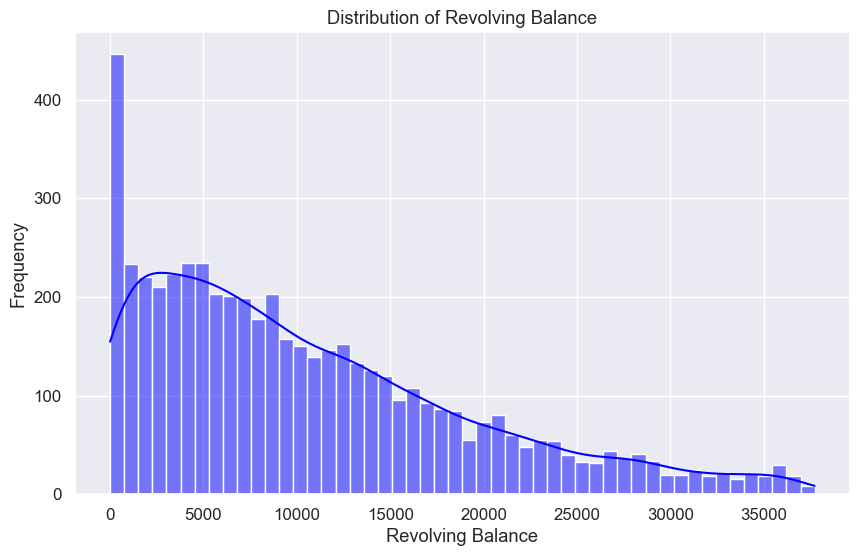

In [376]:
# Lets us try to replot the box plot after removing the outliers.
# Since there are many outliers, replotting the revol_bal after removing the outliers.
# Calculate IQR
Q1 = np.percentile(loan_df['revol_bal'], 25)
Q3 = np.percentile(loan_df['revol_bal'], 75)
IQR = Q3 - Q1

# Define threshold (e.g., 1.5 times IQR)
threshold = 1.5

# Remove outliers based on IQR
filtered_revol_bal_df = loan_df[~((loan_df['revol_bal'] < (Q1 - threshold * IQR)) | (loan_df['revol_bal'] > (Q3 + threshold * IQR)))]
# Quantitative distribution of revol_bal dataset
print(filtered_revol_bal_df['revol_bal'].describe())
# Box plots for the revol_bal
box_plot_function(filtered_revol_bal_df['revol_bal'],'Box Plot for revol_bal', 'revol_bal')
# Histogram
histogram_plot_function(filtered_revol_bal_df['revol_bal'],'Distribution of Revolving Balance', 'Revolving Balance', 50)

count     5627.000000
mean      6838.030941
std       6615.858854
min          0.000000
25%       2215.575000
50%       4839.000000
75%       9191.705000
max      51745.450000
Name: total_pymnt, dtype: float64


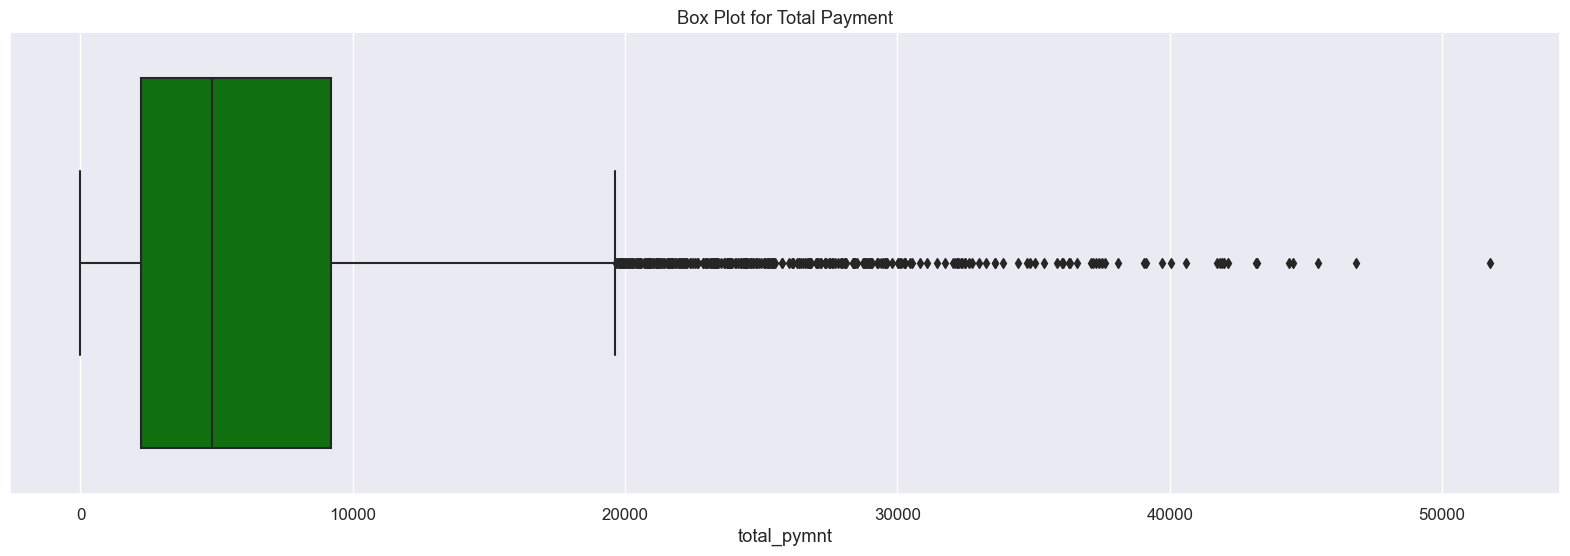

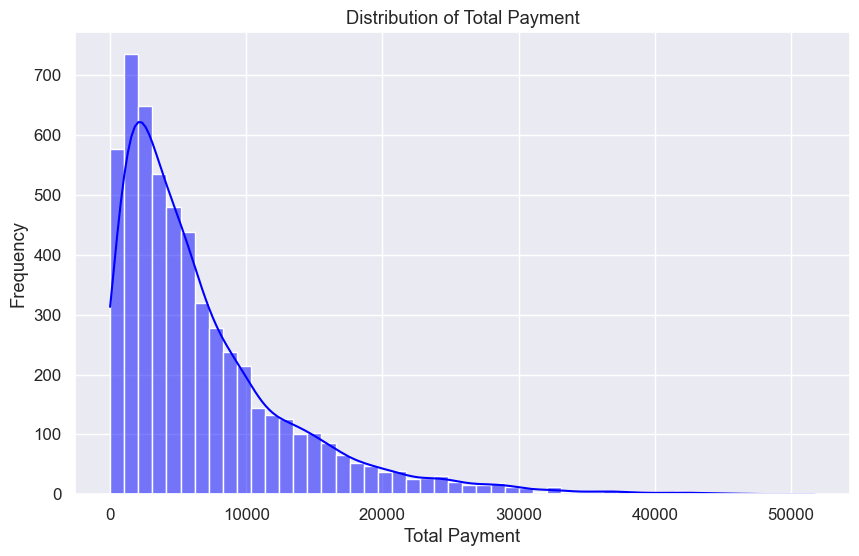

In [374]:
# Quantitative distribution of total_pymnt dataset
print(loan_df['total_pymnt'].describe())
# Box plots for the total_pymnt
box_plot_function(loan_df['total_pymnt'],'Box Plot for Total Payment', 'total_pymnt')
# Histogram
histogram_plot_function(loan_df['total_pymnt'],'Distribution of Total Payment', 'Total Payment',50)

Observation
1. The median total payment is around 4,839. This means that half of the charged-off loans resulted in total payments below this amount, and half had higher total payments.
2. The IQR is 6,976.13. This indicates that 50% of the charged-off loans had total payments within this range.
3. The right-skewed distribution suggests that a small proportion of charged-off loans resulted in significantly higher total payments compared to the majority. 

count     5627.000000
mean      6367.470474
std       6490.913020
min          0.000000
25%       1865.910000
50%       4345.740000
75%       8544.850000
max      51671.580000
Name: total_pymnt_inv, dtype: float64


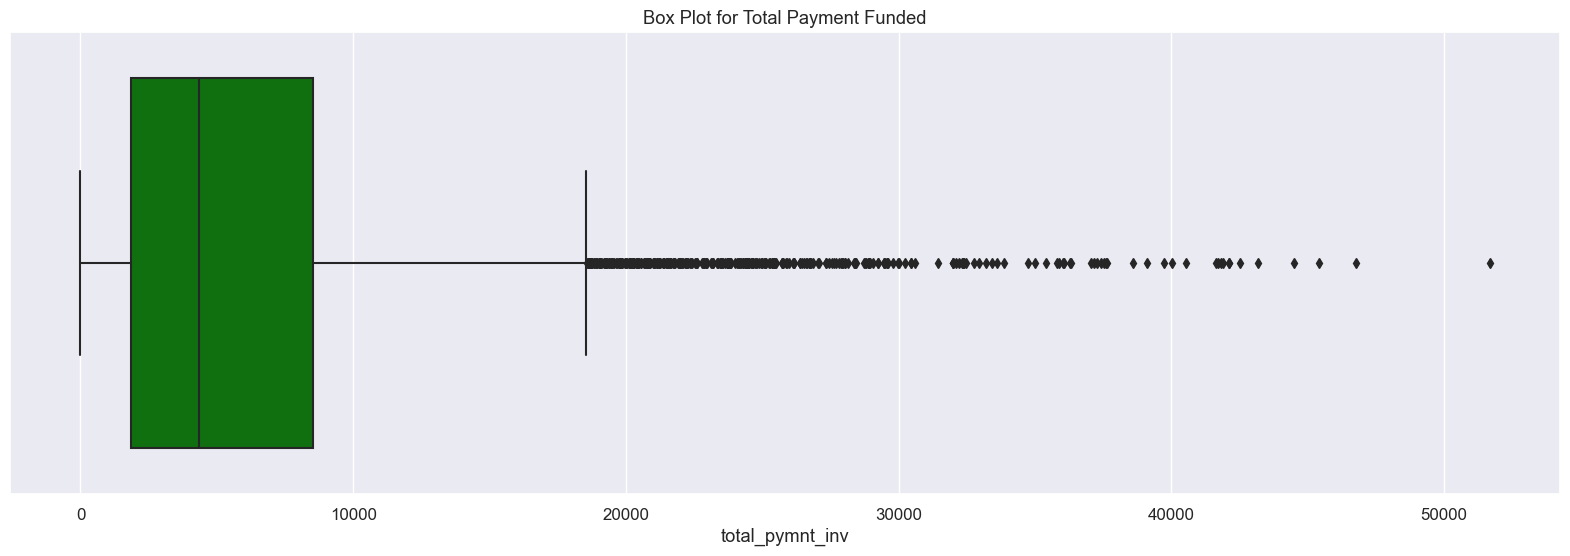

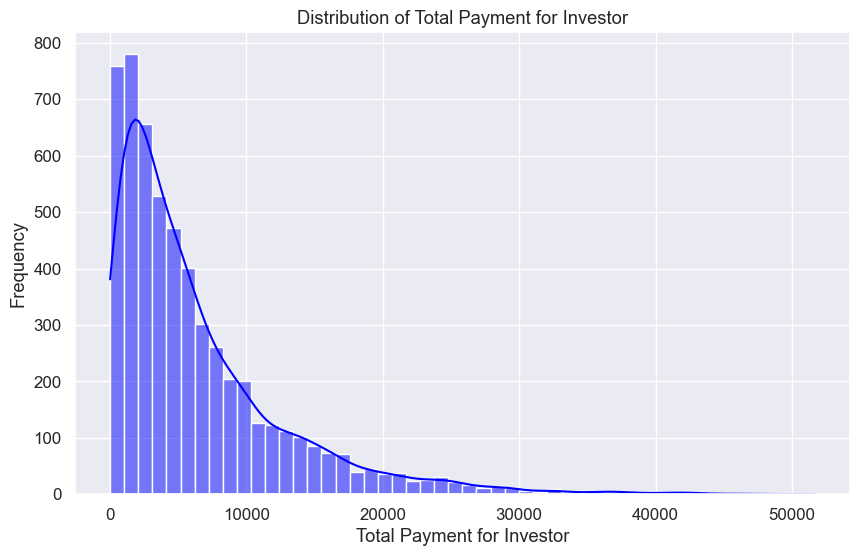

In [375]:
# Quantitative distribution of total_pymnt_inv dataset
print(loan_df['total_pymnt_inv'].describe())
# Box plots for the total_pymnt_inv
box_plot_function(loan_df['total_pymnt_inv'],'Box Plot for Total Payment Funded', 'total_pymnt_inv')
# Histogram
histogram_plot_function(loan_df['total_pymnt_inv'],'Distribution of Total Payment for Investor', 'Total Payment for Investor', 50)

Observations
1. The analysis is more or less similar to the plots of total_pymnt.

# Inferences for Quantitative Univariate Analysis
1. 50% of the defaulters(2594) are having loan amounts more thab $10000. The boax plot indicates right skewed plotting which indicates that the company should exercise caution when giving higher loan amount.
2. We see that most of the defaulters are applicants who have been granted with higher interest rates. The 25th percentile is at 11.31% and 75th percentile is at 16.4%. To reduce the risk of default, the lending company should consider offering loans at lower interest rates when possible.
3. Among loan applicants who charged off, it's observed that the majority of them had monthly installment amounts falling within the range of $168-$457 USD. The firm would closely monitor other factors while granting loan to the applicants who fall in this bucket of installments.
4. Despite higher incomes in some cases, the loans were still charged off. This suggests income alone may not be a strong predictor of creditworthiness or repayment capability
5. Further, company would exercise caution when granting loans to the candidates who have annual income less than $50000.
6. Company should restrict giving loans to individuals who have DTI more than 15%. This indicates stress in their financial status.
7. The variable delinquinces in 2yrs gives an interesting insight that almost all the defaulters have delinquicies as zero. Indicating that this may not help in deciding the approval of loan process.
8.  Loans with a higher number of open credit lines might be associated with a higher likelihood of being charged off. So the firm should exercise caution while granting loans to individuals who have higer open credit lines.
9. A significant portion of charged-off loans had very few inquiries in the last 6 months, so it might suggest that first time applicants have tendency to default more.

## Bivariate Analysis 
1. Loan Amount vs Interest Rate
2. Loan Amount vs Annual Income
3. Grade/Sub-Grade vs Interest Rate
4. Debt-to-Income Ratio (DTI) vs Loan Amount
5. Loan Purpose vs Loan Amount
6. Employment Length vs Loan Amount
7. Line plot to identify trends in loan_amnt over issue_year and issue_month.
8. Line plot to identify trends in int_rate over issue_year and issue_month.

In [309]:
def chart_bivariate_function(chartytpe, data,xcolumn, ycolumn, title ,xlabel, ylabel, xticksrot=0):
    """
    Function to plot the various bivariate plots using SNS.
    Parameters :
    chartytpe - Type of plot. Like scatterplot, lineplot
    data - Dataframe variable
    xcolumn - Column of Dataframe for x-axis
    ycolumn - Column of Dataframe for y-axis
    title - Title of Plot
    xlabel - Label for X-axis
    ylabel - Label for y-axis
    xticksrot=0 - Rotation of x ticks. Default is 0
    
    """
    plt.figure(figsize=(10, 6))
    if chartytpe == 'scatterplot':
        sns.scatterplot(data=data, x=xcolumn, y=ycolumn, alpha=0.6)
    elif chartytpe == 'boxplot':
        sns.boxplot(data=data, x=xcolumn, y=ycolumn, palette="viridis")
    elif chartytpe == 'lineplot':
        sns.lineplot(data=data, x=xcolumn, y=ycolumn, marker='o')
    else:
        pass
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=xticksrot)
    plt.show()

        


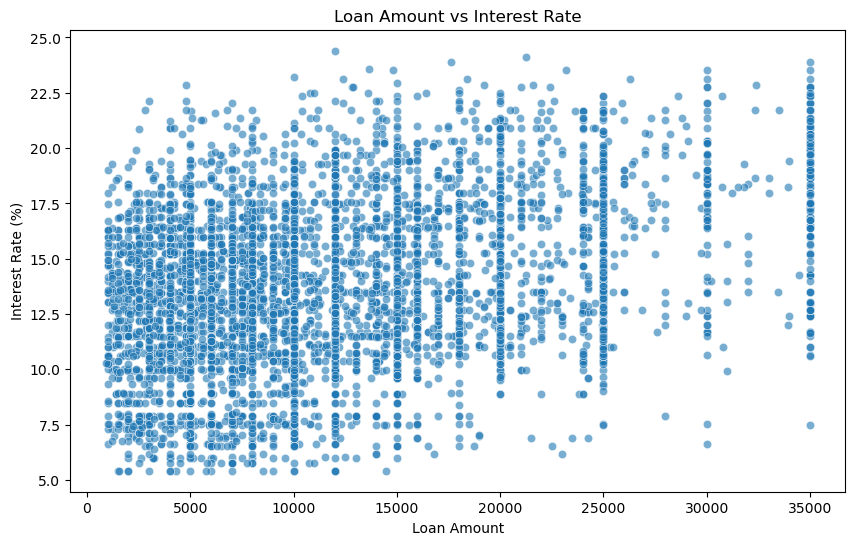

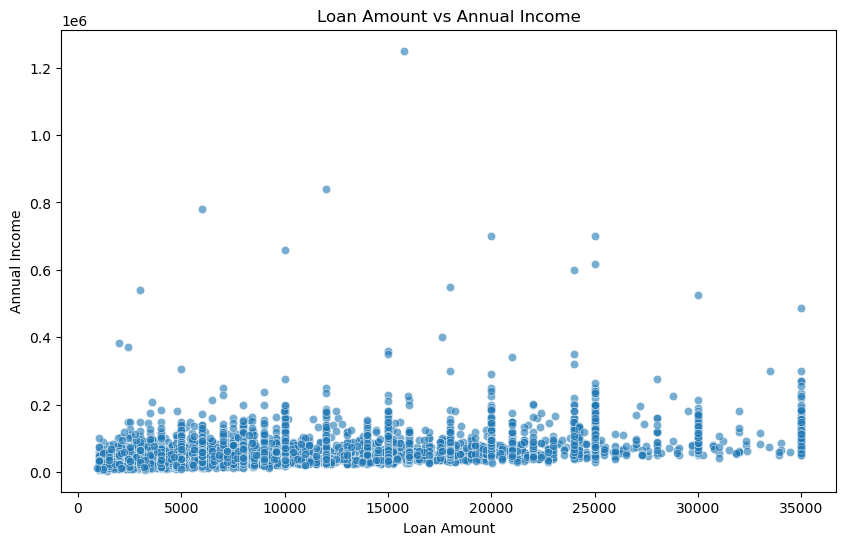

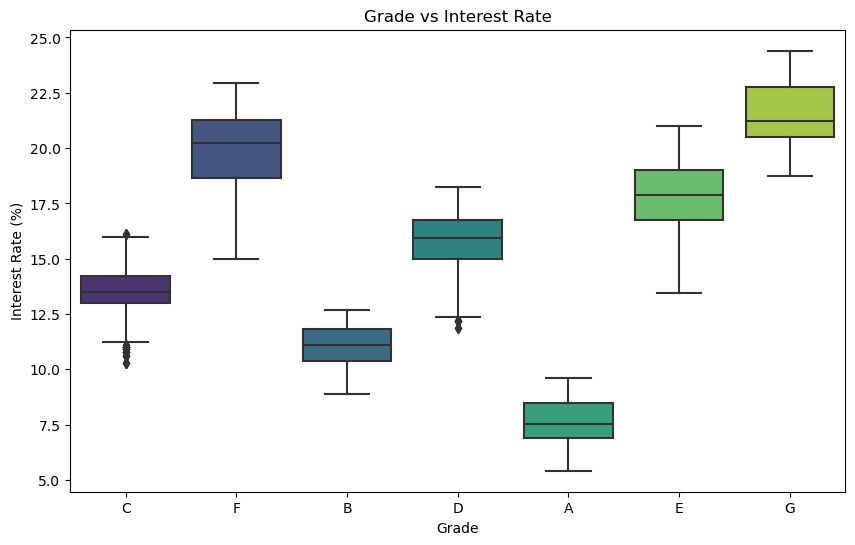

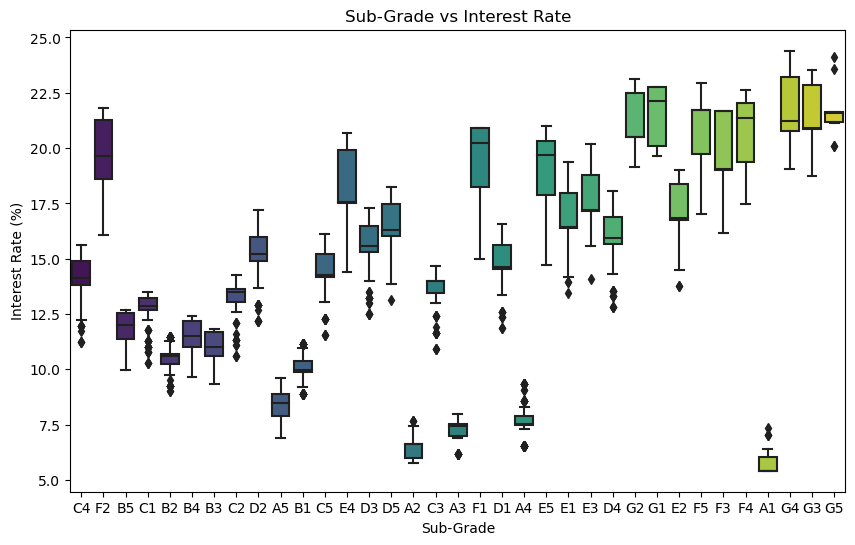

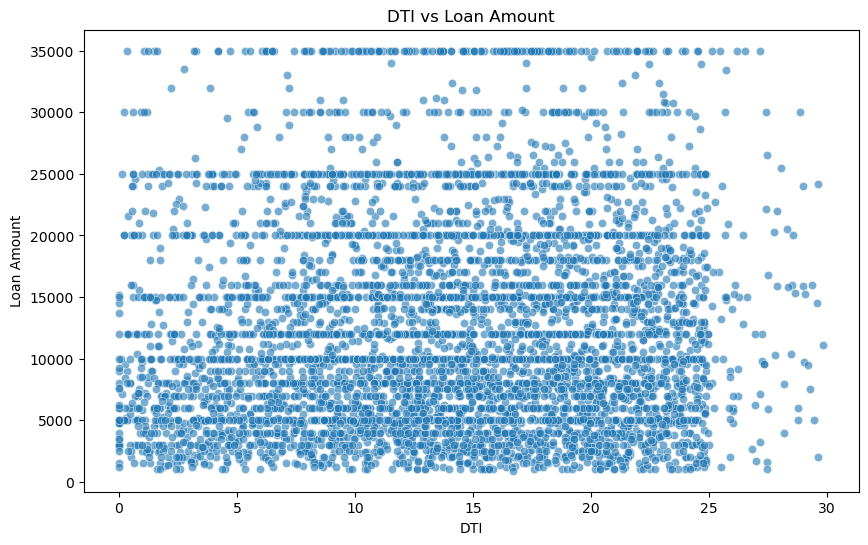

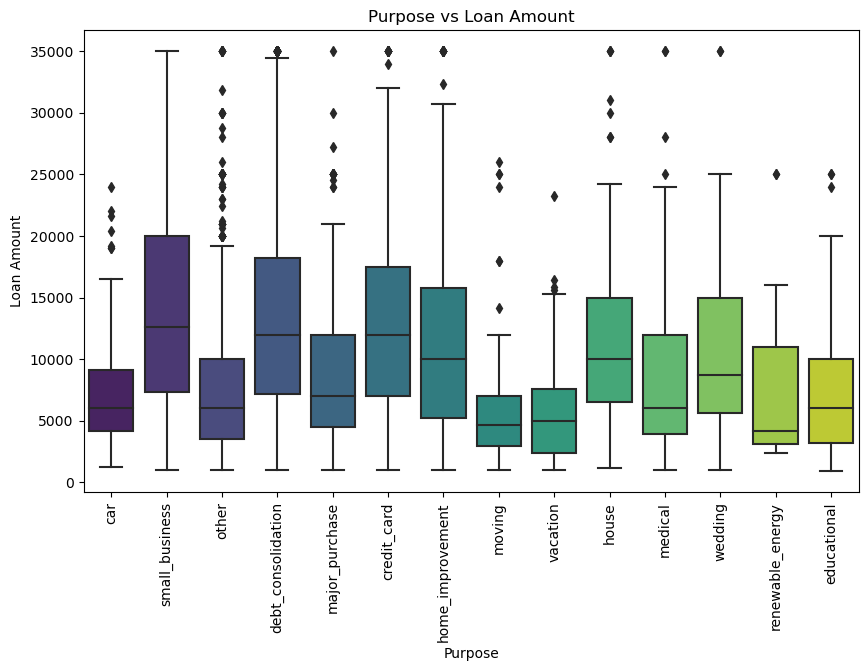

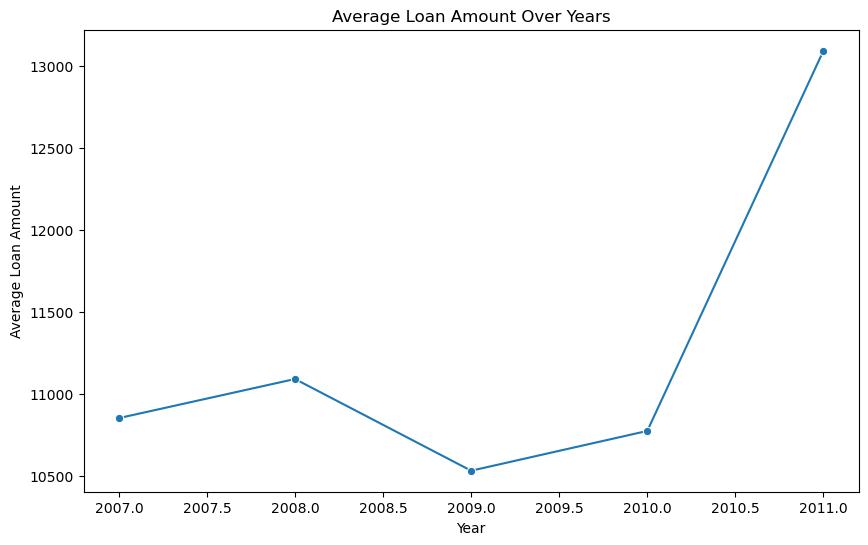

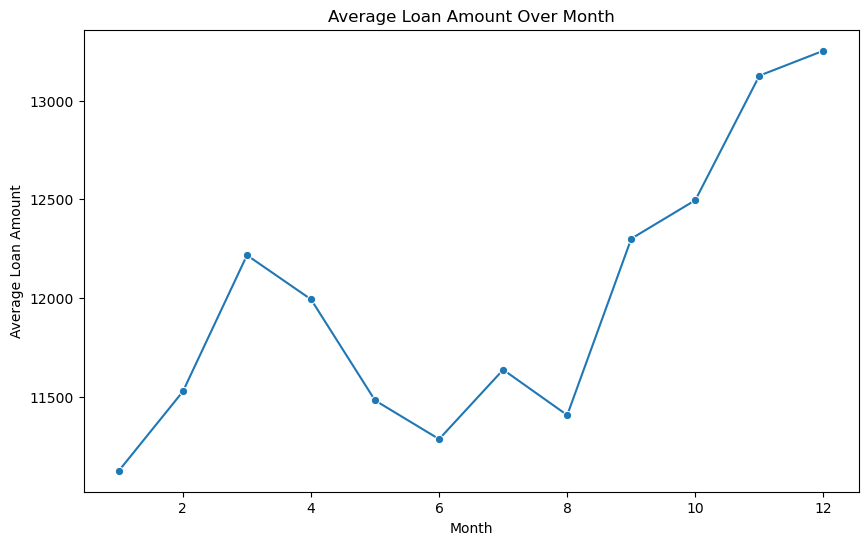

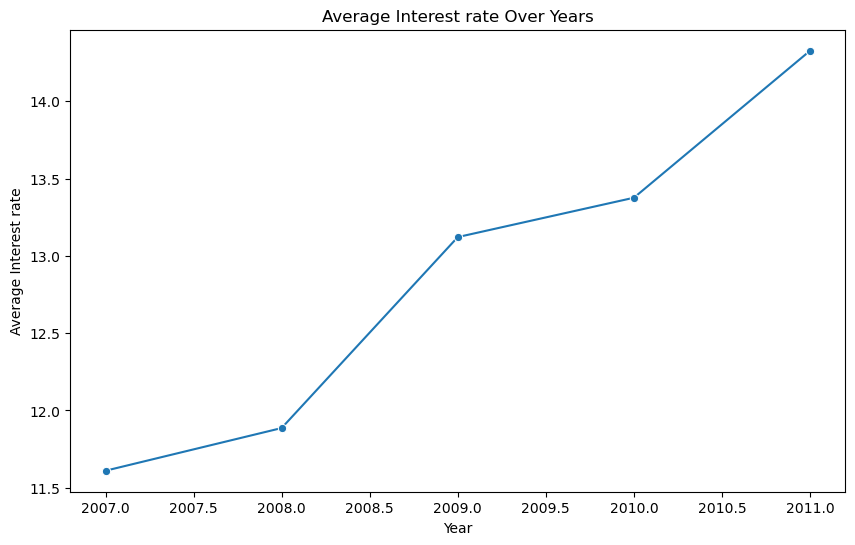

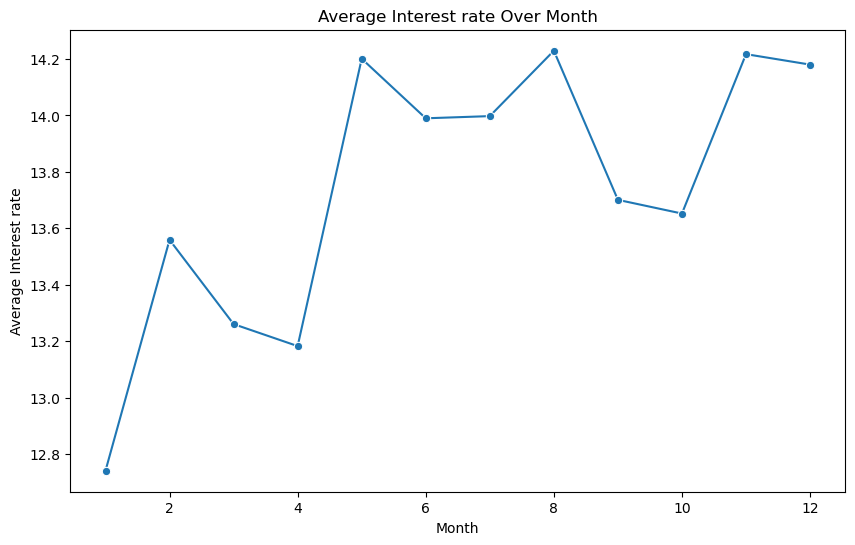

In [313]:
chart_bivariate_function('scatterplot', loan_df,'loan_amnt', 'int_rate', 'Loan Amount vs Interest Rate', 'Loan Amount', 'Interest Rate (%)')
chart_bivariate_function('scatterplot', loan_df,'loan_amnt', 'annual_inc', 'Loan Amount vs Annual Income', 'Loan Amount', 'Annual Income')
chart_bivariate_function('boxplot', loan_df,'grade', 'int_rate', 'Grade vs Interest Rate', 'Grade', 'Interest Rate (%)')
chart_bivariate_function('boxplot', loan_df,'sub_grade', 'int_rate', 'Sub-Grade vs Interest Rate', 'Sub-Grade', 'Interest Rate (%)')
chart_bivariate_function('scatterplot', loan_df,'dti', 'loan_amnt', 'DTI vs Loan Amount', 'DTI', 'Loan Amount')
chart_bivariate_function('boxplot', loan_df,'purpose', 'loan_amnt', 'Purpose vs Loan Amount', 'Purpose', 'Loan Amount', 90)

loan_trend = loan_df.groupby(['issue_year'])['loan_amnt'].mean().reset_index()
chart_bivariate_function('lineplot', loan_trend, 'issue_year', 'loan_amnt', 'Average Loan Amount Over Years', 'Year', 'Average Loan Amount')

loan_trend = loan_df.groupby(['issue_month'])['loan_amnt'].mean().reset_index()
chart_bivariate_function('lineplot', loan_trend, 'issue_month', 'loan_amnt', 'Average Loan Amount Over Month', 'Month', 'Average Loan Amount')

int_rate_trend = loan_df.groupby(['issue_year'])['int_rate'].mean().reset_index()
chart_bivariate_function('lineplot', int_rate_trend, 'issue_year', 'int_rate', 'Average Interest rate Over Years', 'Year', 'Average Interest rate')

int_rate_trend = loan_df.groupby(['issue_month'])['int_rate'].mean().reset_index()
chart_bivariate_function('lineplot', int_rate_trend, 'issue_month', 'int_rate', 'Average Interest rate Over Month', 'Month', 'Average Interest rate')


### Observations of Bivariate Analysis Plots
1. There is a weak positive correlation between loan amount and interest rate for charged-off loans. This suggests that larger loans are slightly more likely to be charged off, possibly due to higher risk or difficulty in repayment.
2. There is a weak negative correlation between loan amount and annual income for charged-off loans. This suggests that borrowers with lower annual incomes are slightly more likely to have their loans charged off.
3. The box plot shows a clear trend of increasing interest rates as the loan grade worsens (from A to G). This is expected as higher grades typically indicate lower risk and thus lower interest rates.
4. The spread of the boxes and the presence of outliers also increase as the grade worsens. This suggests that there is more variability in interest rates for lower-grade loans, potentially due to higher risk and more subjective underwriting.
5. The box plot shows even more granularity in the relationship between interest rate and risk. Within each grade, the interest rate generally increases as the sub-grade worsens (e.g., A1 to A5).
6. The spread of the boxes and the presence of outliers are more pronounced at the lower sub-grades, indicating higher risk and greater variability in interest rates.
7. There seems to be a slight positive correlation between DTI (Debt-to-Income Ratio) and Loan Amount. This suggests that borrowers with higher DTI might tend to borrow larger amounts.
8. The box plot shows that certain loan purposes are associated with higher loan amounts. For instance, loans for "small_business," "home_improvement," and "house" tend to have higher loan amounts compared to purposes like "credit_card" or "moving."
9. The plot shows a general upward trend in the average loan amount over the years from 2007 to 2011.
10. The plot shows some fluctuations in the average loan amount across months. There is a noticeable increase in the average loan amount towards the end of the year.
11. The plot shows a clear upward trend in the average interest rate over the years from 2007 to 2011.
12. The plot shows some fluctuations in the average interest rate across months. There is no clear upward or downward trend.


### Inferences of Bivariate Analysis
1. Larger loans are slightly more likely to be charged off, possibly due to higher risk or difficulty in repayment.
2. Borrowers with higher interest rates may be more likely to default, suggesting that lenders may be pricing in higher risk for these loans.
3. Borrowers with lower annual incomes are slightly more likely to have their loans charged off, possibly due to lower financial stability or higher debt burdens.
4. The strong correlation between grade and interest rate, and the increasing spread and outliers for lower grades, suggest that charged-off loans are likely concentrated in the lower grades (D-G) and their corresponding sub-grades.
5. The sub-grade level provides a more nuanced view of risk. Within each grade, the higher sub-grades (e.g., A5, B5) likely have a higher proportion of charged-off loans compared to the lower sub-grades (e.g., A1, B1), reflecting the lender's assessment of increasing risk within each grade.
6. Loan purposes with higher average loan amounts might have a higher risk of default if borrowers struggle to manage the larger debt burden.
7. The plot might reveal that certain loan purposes, such as "small_business" or "home_improvement," have a higher proportion of charged-off loans due to their inherent risks or the financial challenges associated with those projects.
8. The increase in average loan amount towards the end of the year is more pronounced for charged-off loans, it could suggest that borrowers might be taking on larger loans towards the end of the year for holiday spending or other seasonal expenses. This could potentially increase their financial burden and the risk of default.
9. Higher interest rates are associated with increased risk of default. Lenders may be charging higher rates to compensate for the perceived higher risk.

### Correlation Heatmap
A correlation heatmap helping in visualizing the relationships between numerical variables

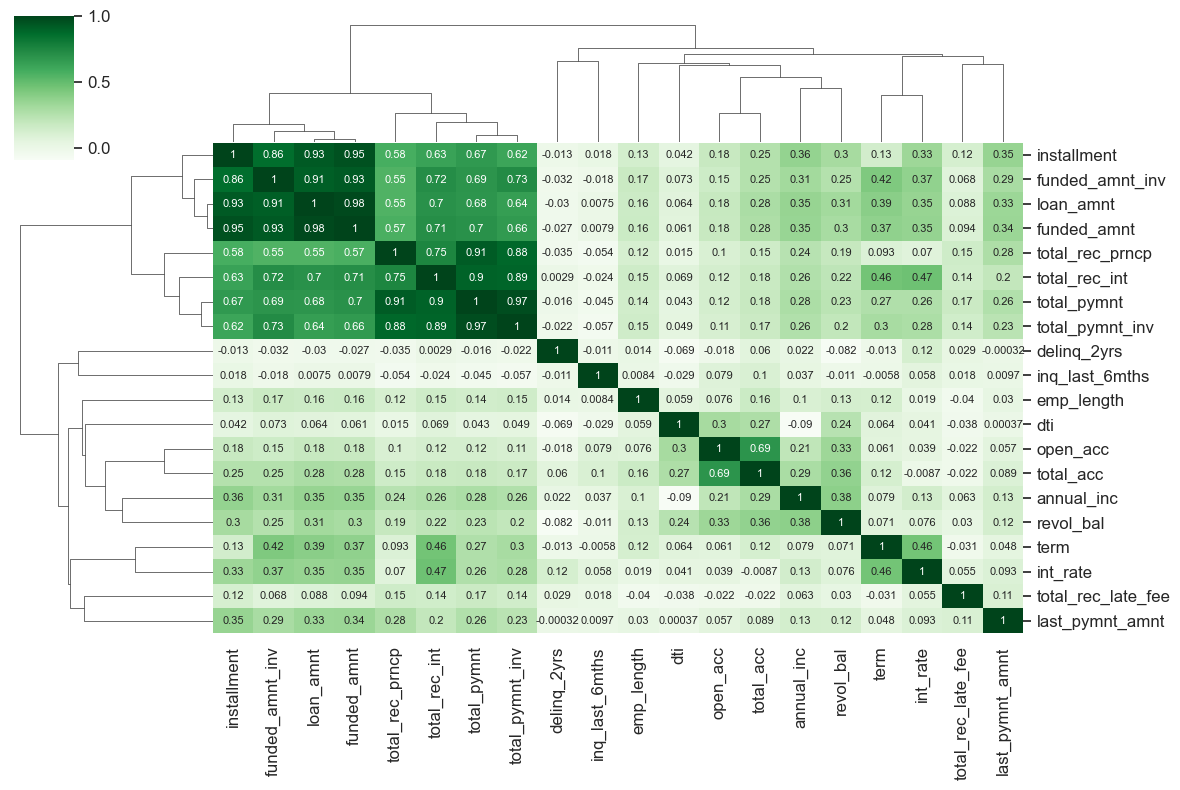

In [323]:
# Extract the columns which have numerical values.
numerical_cols = loan_df.select_dtypes(include=['float64', 'int64']).columns
# Compute the correlation matrix
correlation_matrix = loan_df[numerical_cols].corr()
# Plot the heatmap
sns.clustermap(correlation_matrix, annot=True, figsize=(12, 8), cmap="Greens", annot_kws={"size": 8})
plt.show()

### Analysis from Correlation Matrix

1. Strong Correlation within Loan Amounts:
funded_amnt, funded_amnt_inv, and loan_amnt show very high positive correlations. This indicates that these variables are highly related, as expected.

2. Payment and Principal Correlations:
total_pymnt, total_pymnt_inv, and total_rec_prncp (total principal received) have strong positive correlations. This suggests that borrowers who repay more in total also repay a larger portion of the original principal.
total_rec_int (total interest received) has moderate to high correlations with total_pymnt and total_pymnt_inv. This is expected as interest is a component of the total payment.

3. Delinquency and Inquiry Relationships:
delinq_2yrs (number of delinquencies in the last 2 years) has a weak negative correlation with inq_last_6mths (number of inquiries in the last 6 months). This might suggest that borrowers with recent credit inquiries are less likely to have a history of delinquencies. However, the correlation is weak, so further investigation is needed.

4. Debt-to-Income Ratio (DTI) and Credit Utilization:
dti (debt-to-income ratio) shows moderate positive correlations with open_acc (number of open credit lines) and total_acc (total number of credit lines). This suggests that borrowers with a higher number of open credit lines tend to have a higher DTI.
revol_bal (revolving balance) has a moderate positive correlation with dti. This indicates that borrowers with higher revolving balances are more likely to have a higher DTI.

5. Interest Rate and Loan Term:
int_rate has a strong positive correlation with term. This is expected as longer loan terms typically have higher interest rates.

In [333]:
loan_df.shape

(5627, 31)